# Variables et objets en Python

## Espaces de noms, références, et objets



### Exemple introductif
Considérons le script Python suivant

In [4]:
a = 5 
b, c = a, 31
d = (a > 4) or (b > 4) and (c < 10)
b = c // a
c /= a
L1 = ['C', 'D']
L  = ['A', 'B' , L1]

Dresser un tableau contenant la liste des variables Python à la fin de l'exécution du script en précisant pour chaque variable son type et sa valeur.

| variable | type  | valeur              |
|----------|-------|---------------------|
| a        | int   | 5                   |
| b        | int   | 6                   |
| c        | float | 6.2                 |
| d        | bool  | True                |
| L1       | list  | ``['C', 'D']``           |
| L        | list  | ``['A', 'B', ['C', 'D']]`` |

La figure ci-dessous donne l'état de la mémoire à la fin de l'exécution du script.

![état de la mémoire](img/listeVariableType3.png)

### L'espace de noms
Durant l'exécution du script, une même variable peut **changer de valeur**  mais aussi **de type**. Pour s'y retrouver, Python distingue donc

+ L'espace des objets (=la mémoire RAM), un  **objet** étant une partie la RAM qui stocke l'information de manière structurée,

+ L'**espace des noms** de variables, chaque variable étant une **référence** vers un objet.

Chaque objet est défini par :

le type de donnée qu'il stocke,

+ la valeur de l'objet proprement dite (écrite en binaire dans la mémoire),
+ le nombre de références à cet objet.

Chaque variable (ou référence vers un objet) est définie par:

+ le nom utilisé pour la désigner (c'est son identificateur),

+ l'adresse mémoire de l'objet qu'elle référencie.

Ainsi dans l'exemple précédent, la variable ``L1`` a pour identificateur la chaîne de caractères "L1". Cette variable désigne un emplacement mémoire qui est un objet de type ``list``.

L'objet référencé par la variable ``L1`` :
+ est de type ``list``
+ a pour valeur ``['C','D']``
+ est référencé par les variables ``L1`` et ``L[2]``.

**Python libère-t-il la mémoire des objets non utilisés?**

> Python conserve en mémoire RAM tout objet qui possède au moins une référence.

> Dès qu'un objet cesse d'être référencé, il est supprimé et la mémoire qu'il occupait est libérée.

Exemple, si à la suite du script précédent, on exécute l'instruction d'affectation suivante :

``L1 = 'bonjour'``

Python crée alors un nouvel objet de type ``string`` (chaîne de caractères) contenant les caractères *bonjour*. Puis il fait référencer la variable ``L1`` sur cet objet. Notons que l'objet ``list`` vers lequel ``L1`` pointait avant cette affectation est conservé dans la mémoire car il possède encore une référence qui le désigne. 

Le nouvel état de la mémoire est le suivant:

![état mémoire 2](img/listeVariableType2.png)

### Espace de noms de fonctions
Considérons l'exemple suivant dans lequel la fonction ``isMemberOf`` possède deux arguments.

In [5]:
def isMemberOf(L,x): # renvoie True si la liste L contient l'élément x
    n = len(L)          # nombre d'éléments de L
    res = False         # res est le booléen qui sera renvoyé, 
                        # on l'initialise à la valeur False
    for k in range(n) : # à chaque itération, k prend les valeurs
                        # 0,1,2, .., n-1 => n itérations de la boucle
        if L[k] == x:   # on teste si k-ième élément de L
            res = True  # s'il correspond, on met res à True
    return res          # on renvoie le résultat de la recherche
# ---- script pour tester la fonction
x , y = 20, 7
L1 = [1, 5, 20, 11]
L = [3, 4, 20, 7]
print(isMemberOf(L1, y))

False


L'état de la mémoire juste après l'initialisation de la variable ``res`` est le suivant:

![état de la mémoire, espace de noms de fonction](img/espaceNomFonction2.png)

On constate que **la fonction possède son propre espace de noms**:

+ Les variables ``x`` et ``L`` dans la fonction n'ont rien de commun avec les variables ``x`` et  ``L`` du script d'appel.

+ Les variables ``x`` ,``L``, ``n`` et  ``res`` de la fonction sont appelées *variables locales*.

Remarque : **utilisation d'un itérateur**.

Une variable ``L`` de type ``list`` (ou ``tuple``) est dite *iterable*.

Cela signifie que l'on peut parcourir l'ensemble de ses éléments à l'aide d'une boucle ``for`` :

`` for el in L : ``

La fonction ``isMember`` peut ainsi être réécrite de manière plus compacte:

In [6]:
def isMember(L,x): # renvoie True si la liste L contient l'élément x
    for el in L:   # la 'el' parcourt toutes les valeurs de L 
        if el == x:  # l'élément x est-il trouvé ?
            return True # l'instruction return termine 
                        # l'exécution de la fonction
    return False   # l'instruction ne sera exécutée 
                   # que si aucun élément n'a été trouvé

### Espace de nom englobant et variables globales
Dans une fonction, toutes les variables du script d'appel sont accessibles **en lecture** sauf si elle sont redéfinies en tant que variables locales dans la fonction.

Toute fonction peut donc accèder aux variables de l'espace de noms qui l'englobe.
Exemple:

In [7]:
def getSurfVol(r): # renvoie surface de la sphère et volume de la boule de rayon r
    surf = 4*PI*r**2
    vol = 4/3*PI*r**3
    return surf, vol # renvoie un tuple de deux valeurs
PI = 3.14
s, v = getSurfVol(5)   # dépaquetage (unpacking) du tuple de return

Dans la fonction, ``getSurfVol`` la variable ``r`` **est locale**. La variable ``PI`` est, par contre, définie dans l'epace de noms du script d'appel au moment où la fonction est appelée.

La variable ``PI`` est ainsi accessible en lecture au sein de la fonction. L'espace de noms du script d'appel est appelée **espace de noms englobant**.

**Le mot clé ``global``**

+ Pour permettre à une fonction d'écrire dans une variable de l'espace de nom englobant, il faut utiliser le mot clé ``global``.

+ La variable est donc accessible en lecture et en écriture.

Exemple:

In [8]:
def fibo(n): # renvoie le n-ième terme de la suite de Fibonacci
    global nbAdd # nbAdd doit être définie dans l'espace de 
                 # noms englobant (ex : celui-ci du script)
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        nbAdd += 1 # ici nAdd est accessible en écriture
        return fibo(n - 1) + fibo(n - 2)
nbAdd = 0    # nbAdd est définie dans l'espace de noms du script
res = fibo(5)# appel de la fonction fibo, nbAdd étant définie
print(nbAdd) # nombre total d'additions effectuées pour 
             # calculer fibo(5)

7


## Listes


### Copie de liste

Exemple 1.

In [9]:
L1 = ['A', 'B' , 'C']
L0 = L1# les listes ne sont pas copiées, 
       # L0 et L1 désignent le même objet.

![copieListe1](img/ListeCopie1.png)
Après l'exécution de l'instruction ``L0 = L1``, les deux variables L0 et L1 désignent le même objet : la liste ``L1`` n'est pas copiée.

Exemple 2. 

La méthode ``list.copy()``.

In [10]:
L1 = ['A', 'B', 'C']
L0 = L1.copy() # L1.copy() crée un nouvel objet. 
               # L0 y fait ensuite référence

![copieListe1](img/ListeCopie2.png)
Avec la méthode ``L1.copy()`` un nouvel objet est créé.

### Concaténation de listes

Concanéter deux listes = mettre les éléments deux listes *bout-à-bout* dans une même liste.

Exemple 1.

Opérateur ``+=`` pour les listes.

In [11]:
L1 = ['A', 'B', 'C']
L0 = L1  # L0 et L1 désignent le même objet
L2 = ['D', 'E', 'F']
L1 += L2 # équivalent à L1.extend(L2)

Après l'exécution du script, l'état de la mémoire est:

![concaténation 2](img/ListeConcatenation2.png)


+ Lors de la concaténation ``L1 += L2``, les éléments de ``L2`` sont récopiés puis ajoutés à la fin de ``L1``.

+ L'instruction ``L1 += L2`` se fait **en place**. C'est-à-dire que l'objet ``list`` est modifié mais son adresse mémoire reste la même.

+ Après la concaténation, les références ``L0`` et ``L1`` désignent donc toujours un même objet.

Exemple 2.

Opérateur ``+`` entre deux listes.

In [12]:
L1 = ['A', 'B', 'C']
L0 = L1
L2 = ['D', 'E', 'F']
L1 = L1 + L2 # concaténation de listes, avec l'opétateur '+'
             # un nouvel objet contenant L1 + L2 est créé

A la fin du script, l'état de la mémoire est :

![concatenation1](img/ListeConcatenation1.png)

**Attention :** 

+ Pour exécuter l'instruction ``L1 = L1 + L2``, Python **crée un nouvel objet** contenant les éléments de L1 et les éléments de L2.

+ Cet objet est ensuite référencé par la variable ``L1``. 

+ L'ancien objet que ``L1`` référençait, **n'est pas détruit** car il existe encore une variable qui y fait référence.
### Ajout d'un élément en fin de liste

Méthode ``.append()``

In [13]:
L = ['A', 'B', 'C']
x = 27
L += [x] # équivalent à L.append(x)
print(L)

['A', 'B', 'C', 27]


Pour ajouter un élément en fin de liste, l'opération `` L+=[x]`` (ou ``L.append(x)``) réalise :

la concaténation de la liste ``L`` avec la liste ``[x]`` ne possédant que l'élément ``x``.

**Attention** à l'usage de la méthode ``.append()`` !

In [188]:
L1 = ['A', 'B', 'C']
L2 = ['D', 'E', 'F']
L1.append(L2) # équivalent à L1 += [L2]
print(L1)

['A', 'B', 'C', ['D', 'E', 'F']]


Dans ce cas, ``L1`` désigne une liste de 4 éléments dont le dernier est une liste.

Et non pas une liste de 6 éléments (pour cela, il aurait fallu écrire ``L1.extend(L2)``).

###  Listes en compréhension

Exemple 1.

In [15]:
# liste en compréhension, exemple 1
L = [2 * k + 1 for k in range(10,17)] # k prend les valeurs 10, 11 ,... , 15 ,16 , soit 17-10 = 7 valeurs distinctes
print(L)

[21, 23, 25, 27, 29, 31, 33]


Exemple 2.

Entiers impairs divisibles par 7.

In [16]:
# liste en compréhension, exemple 2 
L = [2*k+1 for k in range(50) if (2*k+1) % 7 == 0] # attention 
                        # à la parenthèse avant le modulo "%"!
print(L) # entiers impairs multiples de 7

[7, 21, 35, 49, 63, 77, 91]


Rappel : ``a % b`` désigne le reste de la division entière de ``a`` par ``b`` ( a modulo b).

In [17]:
# Initialisation d'une liste de listes.
n , m = 3 , 5
L=[[ 0 for j in range(m) ] for i in range(n) ]
print(L) # L est une liste de 3 listes contenant chacune 5 éléments.

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


**Note** pour utiliser la liste ``L`` comme une matrice ``L[i][j]`` à $n$ lignes et $m$ colonnes :

Il faut construire la liste en écrivant d'abord la boucle sur l'indice de colonne j avant la boucle sur l'indice i.

### Sciling

+ ``L[a:b]`` désigne la sous-liste formée des éléments de ``L`` dont l'indice est compris entre a et b-1.

+ ``L[-1]`` désigne le dernier élément, ``L[-2]``, l'avant dernier, etc...

+ ``L[a:b:step]``  désigne la liste des éléments dont l'indice est a pour valeurs :

> a, a+step, a+2step, a+ 3step, ..., a+k.step. Jusqu' à *a+kstep < b* 

> Attention : **b n'est jamais atteint!**

Exemples de sciling sur des listes.

In [18]:
L=['A','B','C','D','E','F','G','H']
print('1: ', L[6])   # affiche le 7ème élément de la liste
print('2: ', L[-3])  # avant-avant dernier élément
print('3: ', L[2:])  # on retire les 2 premiers éléments
print('4: ', L[0:3]) # liste formée des 3 premiers éléments 
                     # (k = 0, 1 et 2)
print('5: ', L[0:6:2]) # liste obtenue en parcourant les éléments 
                       # de 2 en 2 (L[6] étant exclu)
print('6: ', L[-1::-1]) # liste parcourue en sens inverse
print('7: ', L[-1::-2]) # liste parcourue en sens inverse de 2 en 2
print('8: ', L[:])      # liste de tous les éléments, peut servir à
                        # faire une copie L2 = L1[:]
                        # mais il vaut mieux écrire L2 = L1.copy()

1:  G
2:  F
3:  ['C', 'D', 'E', 'F', 'G', 'H']
4:  ['A', 'B', 'C']
5:  ['A', 'C', 'E']
6:  ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
7:  ['H', 'F', 'D', 'B']
8:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


Remarque : ``L2 = L1[ : ]`` est équivalent à ``L2 = L1.copy()``

**Sciling avancé :**

Cas où le **membre de gauche** est obtenu par un *sciling*. 

Cela permet permet de manipuler des sous-listes en une seule instruction (qui cache évidemment des opérations élémentaires)

In [19]:
L1 = [1, 2, 3, 11, 12, 13]
L2 = L1
L1[0:3] = L1[-1:-4:-1] # recopie les 3 derniers éléments 
    # de L1 et les place dans les 3 premières cases
print(L1)
print(L2) # L2 est changée car l'opération est faite "en place"

[13, 12, 11, 11, 12, 13]
[13, 12, 11, 11, 12, 13]


Comparer les deux exemples suivants : 

+ ``L1[:] = L1[-1::-1]``, l'opération se fait **en place**
+ ``L1 = L1[-1::-1]``, un **nouvel objet** est créé et L1 le désigne

In [20]:
# inversion de l'ordre d'une liste, exemple 1
L1 = [k for k in range(10)]
L2 = L1
L1[:] = L1[-1::-1] # la sous-liste de tous les éléments de L1
# devient la sous-liste des éléments dans l'ordre inverse
print(L1)
print(L2) # L2 est modifiée : l'opération a lieu "en place"

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [21]:
# inversion de l'ordre d'une liste, exemple 2
L1 = [k for k in range(10)]
L2 = L1
L1 = L1[-1::-1] # la sous-liste de tous les éléments de L1
# devient la sous-liste des éléments dans l'ordre inverse
print(L1)
print(L2) # L2 n'est modifiée  !!

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [22]:
import numpy as np
A=np.array([1,2,3,4,5,6])
A[:]= A[[1,3,5]+[0,2,4]] # réorganisation des valeurs d'indices paires et impairs
print(A)

[2 4 6 1 3 5]


In [23]:
# Dernier exemple : indexation par un sciling
L1 = ['A', 1, 'B', 2, 'C', 3, 'D', 4]
L2 = L1
L1[0::2] = L1[1::2] # les termes d'indice impairs sont 
                    # mis dans les termes d'indice pairs
print(L1)
print(L2) # L'opération sur L1 s'effectue 'en place'

[1, 1, 2, 2, 3, 3, 4, 4]
[1, 1, 2, 2, 3, 3, 4, 4]


### Fonctions sur une liste

Exemple 1.
Mettre à zéro les éléments inférieurs à une valeur *seuil*.

In [24]:
def seuil(L, x): # L est une liste d'entiers, x est un entier
                # la fonction seuil met à zéro tous les éléments de L qui sont inférieurs à x                
    n=len(L)
    for k in range(n):
        if L[k] < x:
            L[k] =0  # mise à zéro du k-ième élément de L
L0 = [2, 5, 3, 7, 1, 8]
seuil(L0, 5)
print(L0)

[0, 5, 0, 7, 0, 8]


**Remarques :**

+ L'instruction ``L[k] = 0`` met à zéro la k-ième valeur de la liste ``L``, sans qu'une nouvelle liste soit recréée. 

+ La k-ième valeur de la liste est modifiée mais il n'y a pas création d'un nouvel objet liste.

+ Dans la fonction ``seuil``, ``L`` est une variable locale qui fait référence au même objet que ``L0``. 

Donc, en modifiant l'objet référencé par ``L``, on modifie l'objet référencé par ``L0``. Il est donc inutile de mettre un **return** en fin de fonction.

Exemple 2.

Retourner le minimum d'une liste de nombres.

In [25]:
def getMin(L): # renvoie le minimum d'une liste de nombres
    res = L[0] # on initialise avec la valeur du 1er élément
    for el in L[1:]: # sous liste créée en retirant le premier élément
        if (el < res): # el est un candidat pour être le minimum
            res = el
    return res # toute la liste a été parcourue

In [26]:
L0 = [2, 4, 2.1, 1.2, 54., 8, 1.4, 2.01]
print(getMin(L0))

1.2


Exemple 3.

Retourner le minimum d'une liste et son indice.

In [27]:
def getMin2(L): # renvoie le tuple (min(L), iMin) de la liste L
    iRes = 0   # indice du minimum initialisé à zéro
    res = L[0] # valeur du minimum initialisé à la valeur du 1er élément    
    n = len(L) # nombre d'éléments de L
    for k in range(1,n): # on parcourt les éléments à partir du 2ème 
                         # c'est-à-dire celui dont l'indice vaut 1
        if L[k] < res:
            iRes = k   # mise à jour de l'indice
            res = L[k] # mise à jour du résultat
    return (res,iRes) # rq : les parenthèses sont optionnelles
L0 = [2, 4, 2.1, 1.2, 54., 8, 1.4, 2.01]
minimum,indice = getMin2(L0)
print('Le minimum de L0 vaut \t\t', minimum); # \t = caractère de tabulation
print("L'indice du minimum de L0 vaut \t", indice)

Le minimum de L0 vaut 		 1.2
L'indice du minimum de L0 vaut 	 3


Exemple 4.

Retourner la valeur du minimum d'une liste d'entiers et la liste des indices de ces minima dans le cas où il y a plusieurs minima.

In [28]:
def getMin3(L):
    res = L[0]  # initialisation du minimum avec le premier élément
    Lmin = [0]  # liste des minima, initialisée
                # à la liste de l'indice du premier élément
    n = len(L)
    for k in range(1,n) : # boucle sur tous éléments à partir du 2ème
        # 2 cas possibles :
        if L[k] < res :   # cas (1) : on trouve une valeur inférieure à res
            Lmin = [k]    # on réinitialise la liste des indices en mettant celui trouvé
            res = L[k]    # on actualise la valeur du minimum
        if L[k] == res :  # cas (2) : on trouve une valeur égale à res
            Lmin.append(k) # on ajoute l'indice de ce min particulier
    return (res,Lmin)
L0=[2, 4, 3, 5, 2, 6, 4, 2, 7, 2, 8, 4, 3, 4, 2, 2, 5]
print(getMin3(L0)) # affiche (valeur du min, 
                   # Liste des indices des minima)

(2, [0, 4, 7, 9, 14, 15])


**Remarques :**

> La boucle ``for el in L[1:] : `` ne permet pas de conserver la valeur de l'indice des éléments ``el`` lorsque l'on parcourt la liste.

> C'est pourquoi nous utilisons une boucle sur la variable ``k`` qui décrit les indices des éléments de la liste (k = 1, 2, ..., n-1).
## La *class* ``string``

Chaîne de caractères

In [29]:
s = 'bonjour.png'

In [30]:
s[-4:] # comme pour une liste : sélection des 4 derniers caractères de la chaîne

'.png'

In [31]:
chr(48),chr(65) # le code ASCII 48 est celui du caractère zéro, le 65 de la lettre A

('0', 'A')

In [32]:
ord('a') # le 'a' minuscule 

97

Une chaîne de caractères est *iterable*.

In [33]:
chaine = 'Ceci est une chaine de caractères.'
for car in chaine[0:4]: # on se limite aux 4 premiers caratères
    print(car)

C
e
c
i


La méthode ``.split()`` pour une chaîne de caractères (c'est-à-dire pour un objet de type *string*)

In [34]:
help (chaine.split) # appel de l'aide sur la méthode split

Help on built-in function split:

split(sep=None, maxsplit=-1) method of builtins.str instance
    Return a list of the words in the string, using sep as the delimiter string.
    
    sep
      The delimiter according which to split the string.
      None (the default value) means split according to any whitespace,
      and discard empty strings from the result.
    maxsplit
      Maximum number of splits to do.
      -1 (the default value) means no limit.



In [35]:
chaine.split(' ') # découpage de la chaine en séparant par les espaces.

['Ceci', 'est', 'une', 'chaine', 'de', 'caractères.']

*Remarque :* le caractère ``\n`` sert à indiquer un saut de ligne.

In [36]:
chaine2 = '''Ceci est un
petit texte qui
est écrit sur
plusieurs lignes différentes.'''
chaine2

'Ceci est un\npetit texte qui\nest écrit sur\nplusieurs lignes différentes.'

In [37]:
print(chaine2)

Ceci est un
petit texte qui
est écrit sur
plusieurs lignes différentes.



# Numpy : tableaux et fonctions mathématiques

La bibliothèque offre la possibilité de manier des vecteurs et des matrices avec une syntaxe particulièrement puissance.

## Fonctions usuelles


In [38]:
import numpy as np
np.cos(np.pi / 3)

0.5000000000000001

In [39]:
np.exp(1j * np.pi)

(-1+1.2246467991473532e-16j)

$e^{i \pi}=-1$, noter l'erreur due à la précision du codage des nombres en mémoire.

In [40]:
np.sqrt(1j)

(0.7071067811865476+0.7071067811865475j)

Python donne un sens à la racine carrée d'un complexe : la racine carrée du complexe "$i$" en Python vaut  
$z=e^{i\pi/4}=\frac{1}{\sqrt{2}}\left(1 + i \right)$ et vérifie $z^2=i$.

## Vecteur colonne = tableau 1D à *n* éléments

In [41]:
V1 = np.array([1, 2, 3, 4, 5]) # initialisation du vecteur à partir d'une liste
print(V1)
V2 = np.ones(5)        # méthode .ones()
print(V2)
V3 = np.random.rand(3) # méthode .random.rand()
print(V3) # vecteur de 3 réels alératoires tirés dans [0,1] uniformément

[1 2 3 4 5]
[1. 1. 1. 1. 1.]
[0.06409455 0.49364375 0.17040521]


In [42]:
np.random.randint(1,5,15) # 15 valeurs entières comprises entre 1 et 4

array([4, 2, 1, 3, 3, 2, 3, 4, 3, 2, 2, 1, 4, 4, 2])

Attention la méthode ``numpy.random.randint(a,b)`` fournit des nombres entiers entiers $n$ tels que $$a\leq n <b$$

## Matrice = tableau 2D de *n* x *m* éléments

In [43]:
M = np.array([[1, 2, 3],[4, 5, 6]]) # 2 lignes, 3 colonnes
print(M)
print(type(M)) # class nadarray

[[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>


In [44]:
M.shape # longueur des dimensions

(2, 3)

In [45]:
#accès aux éléments 
L = [] # liste auxiliaire pour stocker les éléments linéaires
for i in range(2):
    for j in range(3):
        L.append((M[i, j])) #i: indice de ligne, j : indice de colonne
print(L)

[1, 2, 3, 4, 5, 6]


Création d'une matrice $M \in \mathscr{M}_{n,p}(\mathbb{R})$, dont le terme général $M_{i,j}$ donné.

In [46]:
M =  np.array([[j**2 + i  for j in range(4) ] for i in range(3) ])
M

array([[ 0,  1,  4,  9],
       [ 1,  2,  5, 10],
       [ 2,  3,  6, 11]])

**Attention :**
+ à l'ordre des boucles  ``for`` dans les listes en compréhension,
+ aux décalages d'indices l'indice de ligne commence à $i=1$ pour la matrice, mais à ``i=0`` pour Python.

In [47]:
M = np.zeros([4, 5]) # génère une matrice nulle
print(M) # matrice 4x5 (4 lignes, 5 colonnes)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [48]:
M = np.random.rand(2,3) # attention pas de crochets (!)
M # matrice 2 x 3

array([[0.40446488, 0.01114828, 0.91496428],
       [0.29639531, 0.3183609 , 0.40483571]])

Exemple : stocker les éléments d'un matrice ``M[i,j]`` dans une liste de listes ``L[i][j]``

In [49]:
n,m=M.shape # détermination de la taille de matrice
L=[[0 for j in range(m) ] for i in range(n)] # attention à l'ordre des indices!
for i in range(n):
    for j in range(m):
        L[i][j]=M[i,j] # noter la différence de syntaxe
print(L)

[[0.40446488212588894, 0.011148282221702832, 0.9149642842562511], [0.29639530974231065, 0.3183608974537544, 0.40483570584575557]]


**Remarque** : L est une liste de listes.

## Avantage des ndarrays sur les listes pour les opérations matricielles ou vectoriels

In [50]:
M1, M2 = np.array([1, 2, 3]), np.array([4, 5, 6])
M1 + M2 # opération terme à terme

array([5, 7, 9])

In [51]:
M1 *= 2 # multiplication de tous les termes par 2
print(M1)

[2 4 6]


In [52]:
np.exp(M1) # exponentielle de chaque terme

array([  7.3890561 ,  54.59815003, 403.42879349])

In [53]:
np.linalg.norm(M2) # norme 2 

8.774964387392123

In [54]:
np.sqrt(4**2 + 5**2 + 6**2)

8.774964387392123

Remarque : la biliothèse **numpy.linalg** possède toutes les méthodes d'algèbres linéaires de base (produit scalaires, vectoriel, matriciels, inversion de matrice, vecteurs et valeurs propres, normes, déterminant, décomposition de matrices, ... Son étude n'est pas au programme et vous devez généralement proposer les algorithmes sans son aide!

In [55]:
L = M.tolist() # matrice en list
L

[[0.40446488212588894, 0.011148282221702832, 0.9149642842562511],
 [0.29639530974231065, 0.3183608974537544, 0.40483570584575557]]

In [56]:
L + L # ATTENTION l'opérateur '+' pour une liste est une concaténation

[[0.40446488212588894, 0.011148282221702832, 0.9149642842562511],
 [0.29639530974231065, 0.3183608974537544, 0.40483570584575557],
 [0.40446488212588894, 0.011148282221702832, 0.9149642842562511],
 [0.29639530974231065, 0.3183608974537544, 0.40483570584575557]]

Accès aux éléments d'un tableau ``ndarray`` : sciling et *sciling avancés*

In [57]:
M = np.array([[1+i*5+j for j in range(5)] for i in range(4)])
print('M = \n',M)
print('M[2,:] =  ', M[2,:]) # ligne d'indice 2    = 3ème ligne
print('M[:,0] =  ', M[:,0]) # colonne d'indice 0  = 1ère colonne

M = 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]
M[2,:] =   [11 12 13 14 15]
M[:,0] =   [ 1  6 11 16]


**Combinaison linéaire** de deux lignes d'une matrice.

L'opération

$$\textrm{(ligne k)} \leftarrow  \textrm{(ligne k)} -\alpha\, \textrm{(ligne j)}$$
s'écrit:

In [ ]:
M[k, :] -= alpha * M[j, :]

Accès aux éléments d'un tableau Numpy en **utilisant d'une liste d'indices :**  

Ce qui suit est **spécifique aux ``ndarray``** et n'est pas possible avec des  objets de type ``list``.

In [100]:
M[[0,2],:] # sous- matrice formée des lignes d'indices 0 et 2
           # c'est-à-dire de la 1ère et de la 3ème ligne    

array([[ 1,  2,  3,  4,  5],
       [11, 12, 13, 14, 15]])

In [101]:
M[[2,0],:] # sous-matrice formée de la 3ème et de la 1ère ligne

array([[11, 12, 13, 14, 15],
       [ 1,  2,  3,  4,  5]])

**Permutation de 2 lignes** : valable **uniquement** pour des tableaux Numpy. (impossible pour les listes)

In [102]:
i, j = 0, 3 # indice de la 1ère et de la 4ème ligne
M[[i,j],:] = M[[j,i],:] # Permutation de la ligne d'indice i et de la ligne d'indice j

> L'opération précédente est faite **en place**.

**Attention :** ``M[i,:], M[j,:] = M[j,:], M[i,:] `` est **faux** car une des deux lignes écrase les données de l'autre.

Exemple 2.

**Produit matriciel**

+ Ecrire une fonction ``prod(A,B)`` qui reçoit en argument deux matrices et renvoie le produit $A \times B$ (au sens du produit matriciel usuel). 

+ Les objets A et B **doivent rester inchangés** après l'opération : le produit doit donc correspondre à un nouvel objet ``ndarray``.

+ Donner la complexité dans le cas où $A\in\mathcal{M}_{n,p}(\mathscr{R})$ et $B\in\mathcal{M}_{p,q}(\mathscr{R})$.

Solution : 

> Le produit n'existe que si le nombre de colonnes de la 1ère matrice et égal au nombre de lignes de la seconde.

> Le terme général de la matrice produit $M=A\times B$ est donné
par:

$$M_{i,j}=\sum_{k=1}^{p} a_{ik} b_{kj}$$

L'algorithme est le suivant:
+ d'abord vérifier la compatibilité des dimensions
+ créer une matrice résultat initialisée à zéro (nouvel objet)
+ faire l'opération sur chacun des termes de la matrice résultat

In [103]:
def prod(A,B):
    n, p = A.shape# A est de dimension n,p
    p2, q = B.shape # B est de dimension p2,q
    if (p != p2):
        print('Dimensions incorrectes')
        return np.array([[]]) # matrice vide
    M = np.zeros([n,q])       # n lignes, q colonnes
    for i in range(n):        # i : indice de lignes
        for j in range(q):    # j : indicie de colonnes
            # calcul de la somme sur k
            somme = 0  # initialisation de la somme
            for k in range(p):
                somme += A[i, k] * B[k, j]
            M[i, j] = somme
    return M            

In [104]:
# essai sur un exemple
M1 = np.array([[1, 2, 3], [4, 5, 6]])
M2 = np.array([[1, 2], [4, 5], [6, 7]])
prod(M1, M2)

array([[ 27.00,  33.00],
       [ 60.00,  75.00]])

In [105]:
np.matmul(M1, M2) # avec la biliothèque Numpy

array([[27, 33],
       [60, 75]])

Complexité : 

> L'algorithme comporte deux boucles ``for`` de $n$ et $q$ répétitions pour calculer chaque terme de la matrice produit. De plus, pour chacun des termers  de la matrice produit, on effectue $p$ multiplications et sommes.

> La complexité est donc de l'ordre de $n\times q\times p$. Dans le cas de matrice carrées, elle est en $\mathcal{O}(n^3)$. C'est donc un algorithme coûteux.

**Exemple 3**. Ecrétage des termes d'une matrice.

Ecrire une fonction Python ``ecrete(M,vMin,vMax)`` qui reçoit une matrice et deux nombres et **modifie la matrice M** de manière à ce que ses termes soient modifiés comme suit:
+ les termes compris entre vMin et vMax sont inchangés.
+ les termes supérieurs à vMax sont mis égaux à vMax.
+ les inférieurs à vMin sont mis égaux à vMin.

In [106]:
def ecrete(M,vMin, vMax): # ecretage de la matrice M
    n, p = M.shape
    for i in range(n) : # parcourt les lignes
        for j in range(p) : # parcourt les colonnes
            val = M[i,j] # lecture du terme de matrice
            if val > vMax:
                M[i, j] = vMax
            if val < vMin:
                M[i, j] = vMin
# NOTE : l'opération est faite 'en place', il n'y a pas de RETURN

In [107]:
#validation
M = np.random.randint(-10, 11, [5, 5])
M

array([[ 6,  8, -5, 10, -3],
       [ 9, -2,  4,  5, -4],
       [ 3,  3, 10,  7, -6],
       [-4, -3, -5, -3, -4],
       [ 2,  1, 10,  2,  2]])

In [108]:
ecrete(M, 0, 5) # cette fonction ne renvoie rien mais modifie M
print(M)

[[5 5 0 5 0]
 [5 0 4 5 0]
 [3 3 5 5 0]
 [0 0 0 0 0]
 [2 1 5 2 2]]


**Exemple 4** : extraction des parties triangulaires inférieure, supérieure et de la diagonale d'une matrice carrée.

Ecrire une fonction ``splitLUD(M)`` qui, reçoit en argument une matrice carrée M, et renvoie le *tuple* (L,U,D) constitué des trois matrices:

+ L partie triangulaire inférieure, les termes au dessus de la diagonale sont nuls.
+ U partie triangulaire supérieure, les termes en dessous de la diagonale sont nuls.
+ D partie diagonale = terme de la diagonale, les autres termes étant mis à zéro.

Remarque : les matrices $L$, $U$, $D$ et $M$ vérifient le relation $L+U-D=M$.

In [109]:
def splitLUD(M):
    n,p=M.shape
    if n!=p: # on choisit de vérifier que la matrice est carrée, mais ce n'est pas demandé
        print('Matrice non carré')
        return ([],[],[]) # n tuple de 3 listes vides 
    L=np.zeros([n,n]) # création d'une matrice n x n initialisée à zéro
    U=np.zeros([n,n]) # attention à bien récréer de nouveaux objets avec la méthode np.zeros 
    D=np.zeros([n,n]) # 
    for i in range(n) :       # indice de ligne
        for j in range(n) :   # indice de colonne
            # attention à la logique des tests!
            if (i==j): # diagonale
                D[i,j]=M[i,j]
            if (i>=j): # i >=j => on est dans le triangle INFERIEUR
                L[i,j]=M[i,j]
            if (i<=j): # i >=j => on est dans le triangle SUPERIEUR
                U[i,j]=M[i,j]
    return (L,U,D) # mise en tuple pour renvoyer les résultats    

In [110]:
# Validation avec une matrice 5 x 5 de valeurs entières
M=np.array([[ 1+i+5*j for j in range(5)] for i in range(5)]) # list en compréhension
(l,u,d)=splitLUD(M)
print(l)
print(u)
print(d)

[[ 1.00  0.00  0.00  0.00  0.00]
 [ 2.00  7.00  0.00  0.00  0.00]
 [ 3.00  8.00  13.00  0.00  0.00]
 [ 4.00  9.00  14.00  19.00  0.00]
 [ 5.00  10.00  15.00  20.00  25.00]]
[[ 1.00  6.00  11.00  16.00  21.00]
 [ 0.00  7.00  12.00  17.00  22.00]
 [ 0.00  0.00  13.00  18.00  23.00]
 [ 0.00  0.00  0.00  19.00  24.00]
 [ 0.00  0.00  0.00  0.00  25.00]]
[[ 1.00  0.00  0.00  0.00  0.00]
 [ 0.00  7.00  0.00  0.00  0.00]
 [ 0.00  0.00  13.00  0.00  0.00]
 [ 0.00  0.00  0.00  19.00  0.00]
 [ 0.00  0.00  0.00  0.00  25.00]]


In [111]:
l + u - d - M # On vérifie numériquement M = l+u-d

array([[ 0.00,  0.00,  0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00,  0.00,  0.00],
       [ 0.00,  0.00,  0.00,  0.00,  0.00]])

Autre méthode en utilisant des listes d'indices (**difficile**)

In [112]:
# création de deux listes d'indices, iLow et jLOw, telles que 
# M[iLow[k],jLow[k]] désigne un élément de M situé sous la diagonale principale
iLow = [ i for i in range(5) for j in range(5) if i>j] # indices i
jLow = [ j for i in range(5) for j in range(5) if i>j] # indices j

In [113]:
M[iLow,jLow] = 0 # mise à zéro de tous les termes situés sous la diagonale
M

array([[ 1,  6, 11, 16, 21],
       [ 0,  7, 12, 17, 22],
       [ 0,  0, 13, 18, 23],
       [ 0,  0,  0, 19, 24],
       [ 0,  0,  0,  0, 25]])

**Synthèse  : Tableau vs Liste de listes**
 
 | Tableau | Liste de listes|
 | :- |  :- |
  | éléments du même type| éléments de type quelconque |
 | nombre d'éléments fixé| ajout possible (concaténation)|
| $\verb|+|$ : ajouter des éléments | $\verb|+|$ : concaténer |
| $\verb|*|$ : multiplier | $\verb|*|$ : répéter |
| $\verb|==|$ : comparaison terme à terme | $\verb|==|$ : comparaison globale |
| $\verb|tab[i,j]|$ | $\verb|L[i][j]|$ |
| $\verb|n,m = tab.shape|$ | $\verb|n = len(L)|$ ; $\verb|m = len(L[0])|$ |



## Codage des nombres réels en mémoire.

Remarque : les valeurs étant de type ``float`` la relation d'égalité n'a AUCUN SENS!

Rappel : 

En informatique, les nombres 'réels' sont codés de manière approchée et on ne représente qu'un sous-ensemble fini de $\mathbb{R}$.

En Python, le type ``float`` est un flottant en double précision c'est-à-dire codé sur 64 bits selon la norme IEE 754 : le signe est codé sur un bit, l'exposant est codé sur 11 bits, la mantisse sur les 52 bits restant.

> La précision relative du codage est de $2^{-52}\sim 2\,10 ^{-16}$. C'est la précision du *zéro* pour la machine. C'est l'ordre de grandeur du rapport entre le mètre et l'année lumière.


In [114]:
2**(-52)

2.220446049250313e-16


> Le plus petit nombre codable est $\sim10^{-308}$, le plus grand est $10^{+308}$.

**Ne pas confondre : précision relative et étendue de la représentation**

Exemple : coder le nombre $x=10^{-200}$ en machine avec une précision relative de $10^{-16}$, signifique que si on ajoute $10^{-215}$ à $x$, le codage de $x$ change. En revanche, si on ajoute ajoute $10^{-217}$ à ce nombre $x$, sa valeur demeure inchangée pour la machine ( = le codage n'est pas suffisamment précis représenter une si faible variation relative de $x$).

Idem ajouter $10^{100}$ à $10^{117}$ revient à ajouter zéro: le nombre reste $10^{117}$ car $10^{100}$ est insignifiant devant $10^{117}$ pour la représentation approchée des nombres en machine.

In [115]:
1e-200+1e-215

1.000000000000001e-200

In [116]:
1e-200+1e-217

1e-200

Conclusion : pas de tests d'égalité avec les ``float``.

In [117]:
x = np.sqrt(5)
x**2-5 == 0 # Le résultat peut être aléatoire : il peut donner False ou True selon l'implémentation machine.

False

# Matplotlib.pyplot

Bibliothèque très utile pour représenter des données, des fonctions numériques ou des images en général.

In [17]:
import matplotlib.pyplot as plt # alias des fonctions graphiques
# LA COMMANDE CI-DESSOUS EST SPECIFIQUE POUR REALISER CE DOCUMENT : NE PAS EN TENIR COMPTE ---
%matplotlib inline 
plt.rcParams["figure.figsize"] = (4, 3) # COMMANDE SPECIFIQUE POUR REALISER CE DOCUMENT : NE PAS EN TENIR COMPTE

La fonction la plus utile est la fonction ``plt.plot(xi,yi)``
qui trace la liste de points P de coordonnées xi,yi.

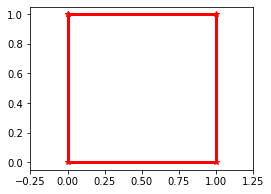

In [119]:
plt.plot([0, 1, 1, 0, 0], [1, 1, 0, 0, 1], '-*r', linewidth=3) # un carré rouge
plt.axis('equal') # repère orthonormé
plt.show()

L'option ``'-*r'`` précise la couleur ``'r'`` = rouge, ``'-'`` = les points sont reliés par un trait continu et chaque point est repéré par le symbole ``*``.

**Exemple 1**. 

Ecrire un script pour tracer, en bleu, la courbe représentation de la fonction :

$f : x \to x^2sin(1/x^2)\quad$ sur l'intervalle $\quad I=[-\pi/8  \quad\pi/8]$.

Tracer sur le même graphe, en rouge, les courbes représentatives des fonctions $\quad g : x\to x^2\quad$ et $\quad -g$.

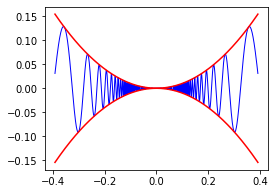

In [120]:
N=1000 # nb de points d'échantillonnage pour le tracé de f
xi=np.linspace(-np.pi/8,np.pi/8,N) # vecteur des valeurs d'abscisses
fi=xi**2*np.sin(1/xi**2) # vecteur de valeurs yi=f(xi)
plt.plot(xi,fi,'b',linewidth=1) # en bleu
plt.plot(xi,xi**2,'r')          # fonction g
plt.plot(xi,-xi**2,'r')         # fonction -g
plt.show()

**Exemple 2**.

Tracé de la courbe paramètrique de Lissajous.
$$\left\{ \begin{array}{ccl} x(t) &= & a \sin(t) \\
y(t) & = & b\sin(nt+\varphi) \end{array} \right.$$

Ecrire une fonction ``traceLissajous(n,phi)`` qui trace la courbe paramètrique pour $t$ variant dans l'intervalle $[0 \quad 100\pi]$, pour $a=b=1$.

In [121]:
def traceLissajous(n,phi):
    ti=np.linspace(0,100*np.pi,int(2e3)) # 2000 points de calcul
    xi=np.sin(ti)
    yi=np.sin(n*ti+phi)
    plt.plot(xi,yi,'k')
    plt.axis('equal')
    plt.show()

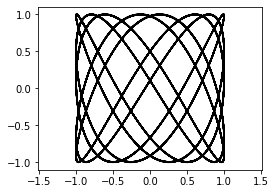

In [122]:
traceLissajous(8/5,np.pi/6) # n=8/5 et phi=pi/6

**Exemple 4 : dérivée numérique.**

On peut approximer le nombre dérivée de $f$ en $x_0$ par une différence finie~:

$$ \left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{x=x_0} \approx
\frac{f(x_0+\varepsilon)-f(x_0)}{\varepsilon}$$

où (encore mieux!) à l'aide d'un schéma centré d'ordre 2~:
$$ \left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{x=x_0} \approx
\frac{f(x_0+\varepsilon)-f(x_0-\varepsilon)}{2\varepsilon}$$

> Ecrire une fonction ``traceDf(f,I=[0,1],epsi=1e-5)`` qui trace la courbe représentative de la fonction numérique ``f`` **passée comme argument**, sur l'intervalle ``[a, b ]``, en utilisant une estimation numérique de la dérivée selon un shéma centré de paramètre $\varepsilon$. Le tracé de la dérivée sera fait en rouge.

Soit la fonction $f : x \to x^3 -(x+2)^2$, $\quad$ tracer sa courbe sur l'intervalle $\quad I=[-2 , +\frac{5}{2}]$ ainsi que celle de sa dérivée.


In [123]:
def traceDf(f,I=[0,1],epsi=1e-5): # trace la courbe représentative de la fonction f sur [a,b]
    a,b=I                     # unpack des bornes [a,b] de l'intervalle
    N = 1000                  # nb de points discrétisant l'intervalle [a,b]     
    xi = np.linspace(a,b,1000)# N points équirépartis
    listDF = np.zeros(N)      # initialisation du vecteur des valeurs de la dérivée
    for k in range(N) :       # pour chaque point de la courbe
        x0 = xi[k]            # abcisse du point
        derivee = (f(x0 + epsi) - f(x0 - epsi)) / (2*epsi)# 2 appels à la fonction f pour estimer la dérivée en x0
        listDF[k] = derivee
    plt.plot(xi,listDF, '-r') # tracé de la courbe en rouge
    plt.show()    

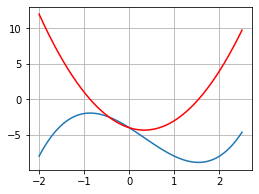

In [124]:
# validation avec la fonction
f= lambda x:x**3-(x+2)**2# utilisation du mot clé lambda => écriture compacte
xi=np.linspace(-2,2.5,100)
plt.plot(xi,f(xi))  # tracé de f
plt.grid(True)      # utilisation d'une grille
traceDf(f,[-2,2.5]) # tracé de la dérivée

## arange, linspace de la bibliothèque Numpy

Ces fonctions servent à générer une liste continue de valeurs uniformément réparties sur un intervalle mais qui sont **différentes** :

- np.arange(a,b,dx) : génère la suite de valeurs : a, a+dx, a+2dx, a+3dx, ... a+k.dx <b. La valeur b n'est jamais atteinte.

- np.linspace(a,b,N) : génère une suite de N valeurs équiréparties entre a et b.

In [125]:
np.arange(0,1,0.1) # entre 0 et 1 avec un pas de 0.1 : la valeur 1 n'est pas atteinte.

array([ 0.00,  0.10,  0.20,  0.30,  0.40,  0.50,  0.60,  0.70,  0.80,
        0.90])

In [126]:
np.linspace(0,1,10) # 10 valeurs entre 0 et 1 inclus : le pas est (b-a)/(N-1)

array([ 0.00,  0.11,  0.22,  0.33,  0.44,  0.56,  0.67,  0.78,  0.89,
        1.00])

**Attention :** ne pas confondre le nombre de *piquets* et le nombre *d'intervalles*!

Ex: écrire une fonction myLinspace(a,b,N) qui fournit un ``ndarray`` de N valeurs équiréparties sur l'intervalle $[a  \quad b]$

In [127]:
# méthode 1 : en partant d'un ndarray initialisé avec np.zeros
def myLinspace(a,b,N):
    res=np.zeros(N) # mise à zéros du vecteur résultat
    dx=(b-a)/(N-1)
    for k in range(N): # k varie de 0 à N-1 dans cette boucle
        res[k]=a+k*dx # on vérifie que pour k=0, res=a et pour k = N-1, res=a+(N-1).dx vaut bien b
    return res
myLinspace(0,1,10)

array([ 0.00,  0.11,  0.22,  0.33,  0.44,  0.56,  0.67,  0.78,  0.89,
        1.00])

In [128]:
# méthode 2  : en passant par une liste vide, en utilisant la méthode append(),
#              puis en convertissant la liste en ndarray
def myLinspace(a,b,N):
    L=[] # liste vide
    dx=(b-a)/(N-1) # écart entre deux valeurs
    for k in range (N):
        L.append(a+k*dx)
    return np.array(L) # conversion de la liste de nombre en ndarray
myLinspace(0,1,10)    

array([ 0.00,  0.11,  0.22,  0.33,  0.44,  0.56,  0.67,  0.78,  0.89,
        1.00])

# Algorithmique

[**algorithme**] = (n.m. du nom du mathématicien perse, Al-Khwârizmî, XIXe) suite finie et non ambiguë d'opérations permettant de résoudre une classe de problèmes.

## Complexité

> Dans la conception d'un algorithme, la notion de *complexité algorithmique* est essentielle. Il existe des classes de problèmes pour lesquels des algorithmes simples existent mais sont inutilisables en pratique dès que le nombre d'éléments à traiter est trop grand.

> L'augmentation de la performance des machines (en augmentant la vitesse d'exécution, ou la quantité mémoire, d'un facteur 10, 100 1000 ou plus encore) ne change rien à cette réalité. Toutefois, les *ordinateurs quantiques* autorisent la mise en oeuvre d'**algorithmes quantiques**  permettant de résoudre des problèmes qui semblent inacessibles aux machines traditionnelles (cf [algorithme de Shor](https://fr.wikipedia.org/wiki/Algorithme_de_Shor)). Pour l'heure les performances des machines quantiques sont encore très limitées mais des frameworks (cf [qiskit](https://qiskit.org/) par exemple pour une implémentation en Python) sont proposés par les fabricants.

> La mise au point des ordinateurs quantiques remet en cause le fonctionnement actuel de la **sécurité informatique** qui répose précisément sur la notion de complexité algorithmique.

**Rappels : complexité algorithmique**

> La complexité d'un algorithme quantifie la quantité de ressources (temps ou espace) nécessaire à son exécution.

Conformément au programme, le calcul de la complexité temporelle se limite :

+ au **pire des cas** (cas le plus défavorable, par exemple quand l'élément recherché dans une liste est le denier que l'on teste,
+ au **meilleur des cas** (cas le plus favorable, par exemple quand l'élément recherché dans une liste est le premier que l'on teste ou lorsque l'on souhaite triée une liste qui l'est déjà).

> La complexité est définie **relativement à la taille** $n$ **de l'entrée** considérée (nombre d'éléments de la liste à traiter, nombre d'éléments dans le tableau, dimension de la matrice donnée en entrée, etc...).

La complexité en temps est généralement quantifiée de 3 manières :

+ en comptant précisément le nombre $C(n)$ d'opérations effectuées. Chaque opération élémentaire possède un coût de 1, il faut dénombrer **précisément** toutes les opérations effectuées. Il n'est pas toujours clair de savoir quelles opérations sont à considérer (addition, multiplication, division, comparaison, appel à une fonction, etc...). Généralement, ce choix est précisé dans le contexte.
+ en se limitant aux termes dominants au développement limité du nombre d'opérations pour les grandeurs valeurs de $n$. On se limite au **comportement asymptotique**. Par exemple, pour $C(n)=n(n-1)/2 +3$, on retient $C(n)\sim_{n\to \infty} n^2/2$.

+ en ne gardant que l'**ordre de grandeur** de la complexité dans le pire des cas. On utilise la notation $\mathcal{O}$ (grand "O"), $f(n)=\mathcal{O}(g(n)) \Leftrightarrow \exists M>0\, \vert \forall n>M, \, f(n)\le M g(n)$. Ainsi, dire qu'un algorithme est d'ordre $n$, implique que son coût d'exécution n'est pas plus que doublé lorsque l'on double la taille de l'objet à traiter.


Voici un tableau qui donne les temps d'exécution en fonction des complexités (on suppose que la machinque effectue $10^9$ opérations par seconde).

|  $\quad$ Ordre de grandeur $\quad$    | Complexité    | Durée pour $n=10^2$ | Durée pour $n=10^6$ |
|:-|:-|:-: |:-: | 
|$\mathcal{O}(\log(n))$      | logarithmique    | $5$ ns |$13$ ns |
| $\mathcal{O}(n)$           | linéaire               |$100$ ns | $1$ ms |
|  $\mathcal{O}(n\log(n))$   | quasi-linéaire         |$500$ ns | $14$ ms |
|  $\mathcal{O}(n^2)$        | quadratique             |$10$ $\mu$s |$17$ min |
|  $\mathcal{O}(n^3)$ ($k\ge 2$) | polynomiale         |$1$ ms | $32$ a |
|  $\mathcal{O}(k^n)$ ($k>1$)    |  exponentielle  |$4\,10^{13}$ a| |

On constate toute l'importance de connaître l'**ordre de grandeur de la complexité temporelle** d'un algorithme lorsque l'on souhaite le mettre en oeuvre de manière concrète.

## Preuves d'algorithmes

Pour chacun des exemples d'algorithme suivants, on demande de :

- prouver sa **terminaison**, c'est-à-dire prouver qu'il n'effectue pas une boucle infinie (ou une récurrence infinie),
- prouver sa **correction**, c'est-à-dire qu'il effectue l'opération pour lequel il est conçu,
- estimer sa **complexité** temporelle, c'est-à-dire indiquer comment le temps d'exécution varie en fonction de la taille $n$ de la donnée d'entrée $\mathcal{O}(\log(n))$, $\mathcal{O}(n\log(n))$, $\mathcal{O}(n)$, $\mathcal{O}(n^2)$, $\mathcal{O}(n^3)$, $\mathcal{O}(a^n)$, ... En justifiant la réponse.


**Note : tous les algorithmes suivants sont à connaître**

### Algorithme de somme



In [129]:
def somme(L): # somme les éléments d'une liste de nombres
    res=0
    for i in range(len(L)):
        res+=L[i] # invariant de boucle ici : res(i) = sum(k=0,i,L[k])
    return res    

**Terminaison** : l'algorithme ci-dessus se termine car il s'agit d'une boucle ``for``.

**Correction** : 

> On note $\verb|res|_i$ la valeur de la variable $res$ à la fin de l'itération d'indice $i$. On définit alors l'invariant de boucle suivant $\quad \verb|res|_i=\sum_{k=0}^{i} L[i]$. (L'*invariant de boucle* est cette égalité dont on va montrer qu'elle est vraie au début et après chaque passage dans la boucle). 

> On constate que : (1) $res=0$ lorsque que $i$ est nul. (2) à chaque itération, si l'expression de $\verb|res|_i$ est vraie à l'itération $i-1$, on voit qu'elle est également vraie à l'itération suivante : $i$ $$ \verb|res|_i=i+\verb|res|_{i-1}$$ 

> En sortie de boucle, l'indice de boucle $i$ a atteint sa valeur finale $i=n-1$, et la variable $res$ vaut donc 
$$\verb|res|=\verb|res|_{n-1}=\sum_{k=0}^{n-1} L[k]. \quad \textrm{Ce qui prouve la correction.}$$

**Complexité** : pour sommer une liste de $n$ éléments, on fait exactement $n$ additions. La complexité est ainsi linéaire.

### Recherche d'un élément nul dans une liste en utilisant une boucle *while*

In [130]:
def contientZero(L):
    res=False
    i=0
    n=len(L) # nombre d'élements de la liste L
    while (i<n) and not res:
        if L[i]==0 : # le i-ème élément est-il nul?
            res=True
        else:
            i+=1 # on passe au suivant
        # invariant de boucle ici 
    return res

**Terminaison** : 

> la boucle ``while`` se termine si $res$ passe à True **ou** si $i$ devient supérieur ou égal à $n$. Supposons que $res$ ne passe jamais à False, dans ce cas, $i$ est un entier qui aumgnente de 1 à chque itération, donc finira par dépasser $n$. Donc la boucle s'arrête. Si par contre, $res$ passe à True, alors la boucle s'arrête. Dans tous les cas, le programme sortira de la boucle ``while``.

**Correction** : 

L'invariant de boucle est:
$$ \mathscr{P}(i) \quad : \quad (\forall k \,\, 0\leq k < i, \, L[k]\ne0\, \textrm{ ET } \, \verb|res|  == \textrm{False} ) \quad \textrm{ OU } \quad ( \verb|L[i]== 0| \, \textrm{ ET }  \,\verb|res| == \textrm{True} )$$

A la fin de la première itération,  et soit $\verb|L[i]|$ est nul, $i=0$ et $\verb|res|$ est True, soit $\verb|L[i]|$ est non nul, $i=1$ et $\verb|res|$ est False. Donc $\mathscr{P}(i=0)$ est vraie.

Supposons que $\mathscr{P}(i-1)$ vraie, montrons qu'elle reste vrai à l'itération suivante. Si $\verb|L[i]|$ est nul alors $\verb|res|$ devient True donc $\mathscr{P}(i)$ est vraie. Si $\verb|L[i]|$ est non nul, $i$ augmente de 1 et $\verb|res|$ reste faux. Donc  $\mathscr{P}(i)$ est encore vraie. Donc $\mathscr{P}(i)$ est un invariant de boucle.

Au sortir de la boucle : soit $\verb|res|$ est vraie et donc $\verb|L[i]|$ est nul, soit $\verb|res|$ est faux, la condition de sortie de boucle est réalisée car $i<n$ est faux. Donc $i=n$ donc, l'invariant de boucle $\mathscr{P}(i=n)$ est le suivant :
$$\forall k \,\, 0\leq k < i, \, L[k]\ne0$$
Ce qui prouve la correction : lorsque la fonction renvoie True, c'est bien que l'indice $i$ telle que L[i] est nulle est trouvé. Lorsque la fonction renvoie faux, c'est qu'aucun des éléments d'indice $\texttt{k=0, 1, 2, .. , n-1}$ n'est nul.

Remarque : exprimer le bon invariant de boucle est souvent la partie la plus délicate (il peut vous être donné). La démonstration de la correction de l'algorithme demande beaucoup de logique.

**Complexité** : dans le pire des cas, *n* itérations. Dans le meilleure des cas une seule itérations.

### Suite de syracuse

Voici une fonction, très simple, dont **on ne sait pas prouver la terminaison** lorsque son argument ``n`` est un entier naturel.

In [131]:
def syracuse(n):
    while (n%2==0):
        n//=2
    L.append(n)# pour voir l'évolution des appels à la fonction
    if n==1 :
        return 1
    else:
        return syracuse(3*n+1)

In [132]:
L=[] # variable "globale"
syracuse(31)
print(L)

[31, 47, 71, 107, 161, 121, 91, 137, 103, 155, 233, 175, 263, 395, 593, 445, 167, 251, 377, 283, 425, 319, 479, 719, 1079, 1619, 2429, 911, 1367, 2051, 3077, 577, 433, 325, 61, 23, 35, 53, 5, 1]


### Recherche du minimum dans une liste.

In [133]:
def getMin(L): # L est une liste de nombres dont on souhaite trouver le minimum.
    res=L[0] # premier élément
    for i in range(1,n) : # on teste tous les éléments d'indice i = 2, 3, .. n-1
        if L[i]<res:
            res=L[i] # mise à jour du min
        # invariant res(i) = min {L[0],L[1], ..., L[i]} 
    return res

**Terminaison** : une boucle *for* se termine toujours.

**Correction** : 

+ L'invariant est $\verb|res|_i=\min\left\{\verb|L[0]|, \verb|L[1]|, \verb|L[2]|, ..., \verb|L[i]| \right\}$. Il est vrai à la fin de la première itération pour $i=0$. Il est héréditaire.

+ En sortant de la boucle, $i=n-1$ et donc $\verb|res|$ est bien de le minimum des $n$ éléments d'indice $i=0, 1,2, \ldots, n-1$.

**Complexité** : dans tous les cas, la boucle effectue $n$ itérations.

### Indice du minimum dans une liste

In [134]:
def getMinIndex(L): # L est une liste de n éléments
    res=0 # ici res est initialisé à l'indice du premier élément
    for i in range(1,len(L)): # on teste tous les éléments suivants
        if L[i]<L[res]:
            res=i # mise à jour de l'indice
    # invariant ici
    return res    

In [135]:
getMinIndex([1,4,3,6,-1,3,3]) # l'élément minimal (-1) a pour indice 4 (c'est le 5ième de la liste)

4

Remarque : s'il y a deux éléments minimum, la fonction renvoie le plus petit des deux indices.

Question : que se passerait-il si on remplaçait l'opérateur ``<`` par l'opérateur ``<=``?

Preuve de terminaison, correction : à adapter de l'exemple précédent.

### Algorithme de tri par sélection

Principe : on souhaite trier par ordre croissant une liste de $n$ éléments.

- On trie progressivement les éléments de la liste en sélectionnant le plus petit parmi ceux qui n'ont pas encore été triés. 

- On procède par itération : les éléments déjà triés sont rangés (par ordre croissant) parmi les $k$ premiers de la liste. 

- Les éléments qui n'ont pas encore été triés restent à leur place en fin de liste.

L'algorithme en français est donc le suivant:

    L'indice k parcourt les indices de tous les éléments SAUF DU DERNIER.
       # Ici, la liste des k-1 premiers éléments est supposée triée.
       Rechercher l'indice i du minimum parmi les éléments  
       restants n-k+1 éléments restants.
       Permuter le k-ième élément avec le i-ème pour 
       que le k-ième corresponde au minimum des restants.
En quittant la boucle, les $n-1$ premiers éléments sont à leur place. Donc le $n$-ième l'est également.

Pour ce tri, on réutilise l'algorithme du recherche de l'indice du minimum dans une liste (exemple précédent). 

In [136]:
def triSelection(L):
    n=len(L)
    nbComp=0
    for k in range(n-1): # inutile de trier le denier élément : k s'arrête à n-2, c-à-d au n-1-ième -élément.
        # recherche du minimum dans la sous-liste L[k:], c'est-à-dire pour les indices k, k+1, k+2, ..., n
        iMin=k # initialisation de l'indice du min
        for i in range(k+1,n): # l'indice i prend les valeurs k+1, k+2, ..., n-1
            nbComp+=1
            if L[i]<L[iMin]:
                iMin=i # mise à jour de l'indice du mini
        L[iMin],L[k]=L[k],L[iMin] # permutation des éléments d'indice iMin et k
    return nbComp

In [137]:
L=[1,4,2,6,3,5,3,9,1,10,41,13,5]
n=len(L)
nb=triSelection(L)
print(L,nb,(n**2-n+1)/2)

[1, 1, 2, 3, 3, 4, 5, 5, 6, 9, 10, 13, 41] 78 78.5


Remarques :

+ le tri s'effectue *en place*, l'instruction RETURN n'est pas nécessaire, la liste L est modifiée car aucun nouvel objet ``list`` n'est créé.
+ la dernière instruction aurait pu être écrite : ``L[k],L[iMin]=L[iMin],L[k]``, c'est parfaitement équivalent.


**Terminaison** : évident car deux boucles for.

**Correction** : 

> Pour établir la correction de l'algorithme, on suppose que l'algorithme *de la recherche de l'indice du minimum dans une liste* a été été prouvé (cf exemple précédent). On suppose ainsi qu'à l'issue de la seconde boucle *for*, celle d'indice $i$, $\verb|iMin|$ est bien l'indice du minimum de la sous-liste des éléments d'indices k, k+1, k+2, ..., n-1.

> Dans la suite on ne raisonne donc plus que sur la première boucle *for*, celle d'indice $k$.

> L'invariant est $\mathscr{P}(k)$, "à la fin de l'itération k de la première boucle *for*, les k premiers éléments de la liste sont à leur place".

> Première itération, $k=0$ : cette proposition $\mathscr{P}(k=0)$ est vraie à la fin de la première itération. En effet, ``L[iMin]`` est le minimum de la liste, il est placé en premier.

> Soit $\mathscr{P}(k-1)$ vraie. Les $k-1$ premiers éléments sont triés. On cherche le k-ième parmi les éléments restants. Celui qui possède cette valeur minimale est placé à la position $k$. Donc $\mathscr{P}(k)$ devient vraie à la fin de l'itération $k$.

> A la sortie de la boucle, $k$ vaut $n-2$. Donc les $n-1$ premiers éléments sont triés, à leur place. Donc le dernier l'est nécessaire. Ce qui prouve l'algorithme.

**Complexité** : évaluons le nombre de comparaisons ``<`` effectuées.

- On sait que pour ``range(a,b)``, l'indice prend les valeurs a, a+1, a+2, ..., b-1, il y donc b-a valeurs d'indices distinctes ("Piquet $\neq$ Intervalle !")
- ``range(n-1)`` : dans la première boucle for, l'indice $k$ prend les valeurs $0$, $1$, $2$, ..., $n-2$ (et non pas $n-1$!)
- ``range(k+1,n)``, il y a donc n-(k+1) valeurs distinctes pour la seconde boucle *for* imbriquée.

On est donc ramenère au calcul de la somme suivante:
$$C(n) \, = \, \sum_{k=0}^{n-2} \, \sum_{i=k+1}^{n-1} \,1$$ 
Il s'agit d'une sommation imbriquée, on commence donc par la somme intérieure:
$$\sum_{i=k+1}^{n-1} 1 = n-(k+1) \quad \textrm{car elle comporte } \, n-(k+1) \textrm{ termes}. $$

Il reste donc
$$C(n) \, = \, \sum_{k=0}^{n-2} \,  n-(k+1)$$ 

Soit $$C(n) \, = \, \sum_{k=0}^{n-2} \,  n-(k+1) \,= \, \sum_{k=0}^{n-2} (n-1) -\sum_{k=0}^{n-2} k $$ 
Soit
$$C(n)=(n-1)^2 - \frac{1}{2}(n-2)\times(n-1)=\frac{n(n-1)}{2}$$

Ainsi,
$$C(n)\sim_{n\to \infty} \frac{n^2}{2}$$

La complexité est donc quadratique.

Exemple 6 : renvoyer une liste d'indices.

Soit ``L`` une listes de nombres.

Rechercher les indices d'une liste dont les valeurs sont inférieures à une valeur choisir comme seul seuil.

La fonction ``getIndexInf(L,t)`` renvoie la liste $\texttt{iList}$ des indices de ``L`` vérifiant :

$$ \texttt{iList}= \{k\, | \, L[k] < \texttt{t} \} \quad \textrm{, t = threshold }$$

Ex: pour $\verb|L = [0.2 , 0.5 , 0.3 , 0.8 , 0.1 , 0.9, 0.5, 0.4 ]|$, et le seuil   

In [138]:
def getIndexInt(L,t):
    iList=[] # on part d'une liste vide
    for k in range(len(L)) :
        if L[k]<t : 
            iList.append(k) # méthode .append()
    return iList

In [139]:
L = [0.2 , 0.5 , 0.3 , 0.8 , 0.1 , 0.9, 0.5, 0.4 ]
getIndexInt(L,0.4)

[0, 2, 4]

### Recherche dichotomique dans une liste triée 

Il s'agit d'un *test d'appartenance* d'un élément à un ensemble.

> Soit L une liste supposée triée :

> La fonction ``rechercheDico(L,x)`` effectue la recherche de l'élément ``x`` dans la liste ``L`` supposée triée. Elle renvoie True si ``L`` contient x et False sinon.

Principe:

On utilise un intervalle de recherche défini par les indices $\texttt{[iA, iB]}$ (indices inclus). A chaque itération, on prend l'indice $\texttt{iC}$ du milieu  de l'intervalle de recherche et on lit la valeur de l'élément $\texttt{L[iC]}$ qui correspond :

+ soit x est trouvé, on s'arrête en renvoyant True,
+ soit x est **supérieure à** la valeur du point milieu. Cela signifie qu'il faut poursuivre la recherche dans la moitié supérieure de la liste triée (c'est-à-dire dans l'intervalle $\texttt{[iC+1, iB]}$), car les valeurs plus grandes s'y trouvent. On poursuit donc la recherche en actualisant la borne inférieure par l'instruction $\texttt{iA = iC + 1}$.
+ soit x est **inférieure à** la valeur du point milieu. On poursuit la recherche en actualisant la borne supérieure par l'instruction $\texttt{iB = iC - 1}$ afin que poursuivre la recherche dans l'intervalle $\texttt{[iA, iC-1]}$

L'algorithme se poursuit donc tant que l'intervalle de recherche est au moins de largeur 1.

In [217]:
def rechercheDico(L,x) : # L est supposée triée par ordre croissant
    iA, iB = 0, len(L)-1 # iA : indice min, iB : indice max.
    while iB  >= iA :    # tant que l'intervalle de recherche contient contient au moins un élément
        iC = (iA+iB)//2  # indice du point milieu arrondi à la valeur entière
        print(iA,iB,iC,L[iC])
        # 3 possibilités
        if L[iC] == x :  # trouvé !
            return True  # l'exécution s'arrête ici
        if L[iC] < x :   # la valeur L[iC] est petite, il faut poursuivre la recherche "à droite"
            iA = iC + 1  # on augmente donc la borne inf de l'intervalle de recherche
        else :
            iB = iC - 1  # dans l'autre cas, il faut poursuivre la recherche "à gauche"
    return False

In [239]:
L = [2, 5, 6, 10 ,11, 25, 100, 120, 123, 340, 430,440]
rechercheDico(L,5)

0 13 6 34
0 6 3 10
0 3 1 5


True

### Un exemple pour bien terminer
Le script suivant se termine-t-il?

In [ ]:
i=0. # i est de type float, ce n'est n'est pas l'entier nul
while i !=1. :
    i+=0.1

> A cause de la représentation approchée des flottants, **le test d'égalité** est indécidable. Cette boucle qui devrait s'arrêter ne s'arrête jamais.

> Avec les nombres réels, les algorithmes **ne doivent comporter aucun test d'égalité.** car ces nombres ne sont pas codés de manière exacte.


# Fichiers

Un fichier *texte* est un fichier dans lequel les données sont écrites de manière lisible par un humain. Un tel fichier peut être ouvert avec un éditeur de texte brut (ex: notepad).

Il est généralement constitué :

+ de lignes de texte, délimité un caractère de fin de ligne (``'\n'`` par exemple);
+ chaque ligne est un ensemble de caractères (chiffres, lettres, symboles) sont codés selon un code standard (ASCII ou ASCII étendu).
+ les lignes peuvent être des suites de chiffres séparées par des espaces et codant une suite de nombres :

``1.2354E-03 1.8578E-03 2.4352E-03 `` 

En pratique, cette suite de caractères doit être décodée pour être convertie en valeurs numériques (``float`` ou ``int`` par exemple) et manipulées en tant que variables.

En pratique nous avons besoin de savoir :
+  lire les données dans un fichier texte
+  écrire les données dans un fichier texte



## Lecture dans un fichier texte

Principe :

+ ouverture du fichier ``f=open(nomFichier,mode)`` (mode = 'r' 'readOnly', 'w' = 'readWrite', 'a' = 'append')
+ lecture des lignes les unes après les autres : **f est iterable**,  ``for line in f:``
+ fermeture du fichier : méthode ``.close()``.

In [143]:
nf='fichierExistant.txt'
f=open(nf,'r')  # 'r' = ouverture en lecture seule
for line in f:
    print(line) # line est de type str (class string)
f.close()       # à ne pas oublier !

FileNotFoundError: [Errno 2] No such file or directory: 'fichierExistant.txt'

## Ecriture dans un fichier texte

Principe :

+ ouverture du fichier ``f=open(nomFichier,'w')`` ('a' = 'append' = ajouter à la suite)
+ écriture des lignes l'un après l'autre : f.write(line2Write) # line2Write est de type ``str``
+ fermeture du fichier : méthode ``.close()``.

Note : la méthode ``.write(s)`` n'admet pour argument que des données de type ``string``. Il est donc nécessaire de faire "soi-même" le travail de formatage des données, en ajoutant les caractères de séparation (``' '``, ``'\n'``, ``'\t'``, selon les cas).

Pour cela une technique possible est d'initialiser une chaîne vide puis à y concaténer les différentes chaînes à ajouter.

Remarque : par défaut la conversion d'un ``float`` en ``str`` se fait avec la précision maximale

In [ ]:
x=np.pi*1e-12
str(x) # str convertit un nombre (int, float, bool) en string

On peut limiter la précision des nombres pour limiter la taille des fichiers sur le disques en supprimant les chiffres non significatifs.

In [144]:
print(f'{x:.5e}') # pour se limiter à 5 chiffres après la virgule

2.23607e+00


Exemple : 

Ecriture des éléments d'un matrice Numpy n x m dans un fichier sous un format de type tableau. Les colonnes sont séparées par le caractère espace ``' '``, les lignes étant séparées par le caractère saut de ligne ``'\n'``.

In [7]:
import numpy as np
A = np.random.rand(5,4) # matrice de 5 lignes et 4 colonnes
nf = 'fichierA.txt'
fA = open(nf,'w') # ouverture du fichier en écriture
n, m = A.shape#
for i in range(n) : # boucle sur les lignes
    Line = ''   # création de la ligne par la méthode .append() 
    for j in range(m-1) : # on traite le dernier caractère à part
        Line += f'{A[i,j]:.5e}'+' '
    Line += f'{A[i,m-1]:.5e}' + '\n' # dernier caractère à part
    print(i,Line)
    fA.write(Line)
fA.close()

0 9.80708e-01 7.36359e-01 6.26657e-01 4.47407e-01

1 8.26815e-02 1.86396e-01 9.97144e-01 7.22546e-01

2 4.70784e-01 5.32645e-01 2.95174e-01 9.93684e-01

3 5.86258e-01 7.55634e-01 2.73882e-01 2.84320e-02

4 6.98171e-01 6.41796e-01 3.74479e-01 9.74810e-01



Voici ce que l'on obtient en ouvrant le fichier **fichierA.txt** avec Bloc-notes :

![blocNoteA](img/blocNoteFichierA.png)

## Fonctions utiles pour la manipulation de fichiers texte

Lorsque l'on manipule des fichiers texte, il faut bien distinguer :
+ les éléments qui sont des caractères, ou des chaînes de caractères
+ les données qui sont représentées par ces caractères (généralement des nombres entiers, ou flottants).

Voici quelques fonctions (méthodes) il faut penser à utiliser lorsque l'on lit ou écrit sur des fichiers texte.

| Méthode | Syntaxe | Rôle|
|:-|:-|:-|
| + | s1+s2  ou s1+=s2 | concatène deux objets de classe str |
| .split() | s.split(sep) | découpe la chaîne s selon le caractère *sep* et renvoie une liste de sous-chaînes |
| str() | str(2.32)='2.32' | convertit le nombre X (float ou int) en chaîne de caractères|
| f'{X:.4e}' | ex : 3.1416E-02 | convertit le nombre en chaîne avec un nombre de chiffres après la virgule (4 ici) |
| int(s) | ex : int('-34')=-34 | convertit la chaîne s en nombre entier |
| float(s) | float('-34')=-34. | convertit la chaîne s en flottant |


# Fichiers image avec matplotlib.mpimg



In [146]:
import numpy as np # pour les ndarray
import matplotlib.image as mpimg # pour ouvrir et sauver les fichiers images
import matplotlib.pyplot as plt  # pour afficher les images

La librairie Numpy permet de manipuler les images comme des tableaux (ndarray) dont les cases représentent des couleurs. Il peut s'agit :

+ de tableau 2D ex: $\verb|tab[i,j]|$ où $i=0..n-1$, et $j=0..m-1$. Dans ce cas l'image est en nuance de gris (0 = noir, le blanc valant soit 255 (unit8) soit 1. (float)). 

+ de tableau 3D ex $\verb|tab[i,j,k]|$ où $i$ est l'indice de ligne, $j$ est l'indice de colonne et $k$ est l'indice de **canal**. Une image comportement généralement 4 canaux : Red, Green, Blue, Alpha. (Le quatrième canal est l'opacité : s'il vaut zéro, le pixel est transparent).

**Attention**, avec cette bibliothèque les images sont vues comme des matrices :

+  le premier indice est celui des lignes, il **représente donc l'axe des y**,
+  le second indice est celui des lignes, il **représente donc l'axe des x**.

``tab[iLigne,jColonne]=image[iY,iX]``




Voici les cinq méthodes les plus utiles :

+ mpimg.imread(nf) : ouvre le fichier image *nf* et le convertit en ``ndarray``
+ mpimg.imsave(nf,tab) : enregistre le tableau *tab* ( de type ndarray) en tant qu'image dans le fichier de nom *nf* (rq nf est un string : 'image.png').
+ plt.imshow(tab) : affichage le ndarray en tant qu'image

+ plt.axis('off') : supprime l'affiche des axes (abscisses et ordonnées) d'une figure matplotlib

+ plt.set_cmap('gray') : utilise la palette des nuances de gris pour les images à un seul canal.



Exemple 1. chargement d'un image depuis le disque

(256, 321, 4)

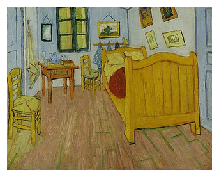

In [147]:
fileName='img/laChambre.png'# nom du fichier
im1=mpimg.imread(fileName)  # imread : convertit le fichier image en ndarray
plt.imshow(im1)             # affiche d'un ndarray en tant qu'image
plt.axis('off')             # retirer les axes et leur graduations
im1.shape     # image à 4 canaux      

(256, 321)

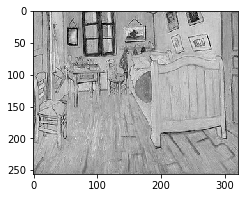

In [148]:
# Extraction d'un canal de couleur
im2=im1[:,:,0]       # sélection de la composante k=0, i.e. Rouge 
plt.imshow(im2)
plt.set_cmap('gray') # palette de couleur : gray =  nuance de gris
im2.shape            # image = tableau 2D

Remarque : cette image est vue comme un tableau de **256** lignes et **321** colonnes.

In [149]:
print(im2.dtype) # .dtype renvoie le format de codage de la nuance de couleur
print(np.min(im2),np.max(im2)) # les valeurs de l'image sont comprise

float32
0.0 0.8509804


Les pixels de cette image sont codés par des nombres flottants (float32) compris entre 0. (noir) et 1. (blanc)

Exemple 2.

Calcul de la luminance d'une image selon la relation :

$$L = (C_{max} + C_{min})/2 \quad \textrm{où} \quad C_{max}=\max(r,g,b) \, \textrm{et} \,
C_{min}=\min(r,g,b)$$

In [150]:
def getLuminance(imageIn) : # convertit RGB --> 1 seul canal
    n,m,k = imageIn.shape # l'image doit être un tableau 3D de type ndarray !
    imageOut = np.zeros([n,m]) # création d'une image résultat (n x m)
    for i in range(n): # lignes
        for j in range(m):
            r = imageIn[i,j,0] # canal R du pixel (i,j)
            g = imageIn[i,j,1] # canal R du pixel (i,j)
            b = imageIn[i,j,2] # canal R du pixel (i,j)
            cmin = np.min([r,g,b]) # np.min() => renvoie la valeur min
            cmax = np.max([r,g,b]) # np.max() => renvoie la valeur max
            imageOut[i,j]=(cmin+cmax)/2
    return imageOut

In [151]:
im1.shape # les 4 canaux de l'image sont R, G, B, Alpha

(256, 321, 4)

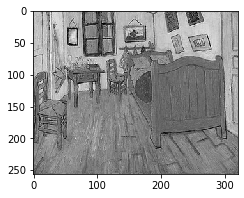

In [152]:
im3 = getLuminance(im1) # 
plt.imshow(im3) # affiche l'image en nuance de gris

Exemple 3.

Modification d'une image.

La fonction ``drawDisk(img,P0,ray,coul)`` dessine d'un disque de centre *P0(y,x)* et de rayon *ray* et de couleur *coul* sur l'image img.

In [153]:
def drawDisk(img,P0=[100,200],ray=50,coul=0.1): # tracé d'un disque
    n,m=img.shape # tableau 2D
    X0,Y0=P0 # coordonnées du centre
    for i in range(n):
        for j in range(m):
            dist2=(i-X0)**2+(j-Y0)**2 # carré de la distance
            if dist2<ray**2: # le point M(i,j) est intérieur au disque
                img[i,j]=coul # on affecte sa couleur    

Ajout d'un disque sur l'image im2

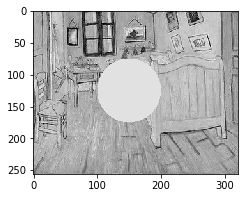

In [154]:
drawDisk(im2,P0=[125,150],coul=0.75) # gris clair au centre de l'image
plt.imshow(im2)
plt.show()

# Numpy au service de l'ingénierie numérique

Dans cette partie on donne illustre l'utilisation de la bibliothèque Numpy pour répondre à des problèmes très courants de l'ingénierie ou la recherche en général. Pour mettre en oeuvre de ces **méthodes numériques**, nous avons besoin d'importer la bibliothèque Numpy et Matplotlib.pyplot

In [155]:
import numpy as np
import matplotlib.pyplot as plt

## Recherche des zéros d'une fonction

**Problématique :**

Soit $f$ une fonction numérique ($\mathbb{R} \to \mathbb{R}$) **continue** et **strictement monotone** sur l'intervalle $I=[ a \quad b ]$ et telle que $f(a)$ et $f(b)$ soient non nuls et de signes opposés, c'est-à-dire tels que :

$$f(a)\times f(b) <0$$

alors l'équation
$$f(x)=0 $$ admet une unique solution sur l'intervalle $I=[ a, b ]$.

> La valeur de $x$ est appelée *le zéro de f* sur $[ a \quad b ]$.

**Résolution approchée :**

> Nous allons décrire 3 algorithmes itératifs permettant d'obtenir, de la solution $x$, un encadrement *aussi précis que l'on veut*, c'est-à-dire une valeur approchée de la solution.

> Chaque algorithme construit ainsi une suite finie de réels $x_0$, $x_1$, $x_2$, ..., $x_k$ qui tend vers $x$.

> En pratique, la **précision du zéro** est limitée par la représentation des réels en tant qu'objet ``float`` et les arrondis lors des calculs successifs. Généralement, l'erreur relative sur la valeur du zéro est ainsi, au mieux, de l'ordre de $10^{-15}$ à $10^{-16}$.




**Ne pas confondre :**

+ la valeur approchée du zéro, c'est-à-dire sa valeur $x_k$ lors la k-ième itération avec k "grand",
+ avec la valeur $f(x_k)$ que prend la fonction en ce point (que l'on souhaiterait nulle, mais qui ne l'est pas rigoureusement).

Selon les cas, la précision de la méthode sera quantifiée par
+ ou bien la distance entre $x_k$ et $x$, on s'impose dans ce cas que $|x_k-x|<\varepsilon_x$
+ ou bien par la valeur que prend la fonction $f$ au point $x_k$, on s'impose dans ce cas que $|f(x_k)|<\epsilon_f$.

> Le premier critère, en $\varepsilon_x$, est défini dans l'espace des $x$, c'est-à-dire l'*espace de départ*.

> Le second critère, en $\varepsilon_f$, est défini dans l'espace des $f(x)$, c'est-à-dire l'*espace des images*.

> Exemple physique : $x$ peut être une position (en mètres), $f(x)$ un effort mécanique (en Newton).


### Dichotomie

Principe : 

+ On découpe successivement l'intervalle $[a \quad b ]$ de recherche en deux. 
+ On regarde le signe de $f$ au point milieu puis on poursuit la recherche :
  + ou bien dans $[a \quad m]$  
  + ou bien dans $[m \quad b]$.
+ On s'arrête lorsque la largeur de l'intervalle de recherche est inférieure à une précision $\epsilon_x$ donnée.

In [156]:
def getZeroDicho(f,a,b,epsilonx=1e-8):
    while abs(b-a) > epsilonx :
        m=(a+b)/2                # point milieu
        if f(m)*f(a) < 0 : # f(m) et f(a) sont-ils de signes opposés?
            b=m  # dans ce cas, on poursuit dans l'intervalle [a m]
        else:
            a=m  # dans ce cas, on poursuit la recherche dans [m b]
    return (a+b)/2  # ne pas oublier de retourner le résultat 

Exemple, avec la fonction $f_1 : x \to f_1(x)=x^3/6-x+1/2$ dont on cherche le zéro sur $[1 \quad 3 ]$.

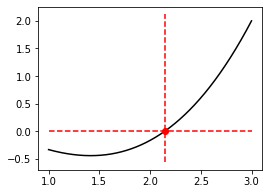

Le zéro de la fonction est :  2.1451026909053326  à 1e-8 près


In [157]:
def f1(x):
    return x**3/6-x+1/2 # définition de la fonction
xi=np.linspace(1,3,1000) # pour tracer la fonction
plt.plot(xi,f1(xi),'-k')
x0=getZeroDicho(f1,1,3)   # appel de la fonction de recherche dichotomique 
plt.plot(x0,f1(x0),'or')    # 'o' = cercle, 'r' = rouge
plt.plot([1,3],[0,0],'--r') #
yl0=plt.ylim() # récupère les limites [ymin, ymax] de l'axe y
plt.plot([x0,x0],yl0,'--r') #
plt.show()
print('Le zéro de la fonction est : ',x0, ' à 1e-8 près')

**Remarque :**

> A chaque itération, on divise par deux la largeur de l'intervalle de recherche.

> Le nombre $n$ d'itérations pour obtenir un encadrement de $x_0$ à $\varepsilon_x$ près en partant d'un intervalle de largeur initiale $(b-a)$ est donc de l'ordre de:
$$\frac{b-a}{2^n} \sim \varepsilon_x$$
Soit $$n\sim \log_2\left(\frac{b-a}{\varepsilon_x}\right)$$

> Dans notre exemple, $b-a = 3-1=2$ et $\varepsilon_x = 10^{-8}$, donc $n \sim \log_2(2/10^{-8})=\ln(2/10^{-8})/\ln(2)\approx 27,57$

La méthode converge donc en 28 itérations environ.

### Méthode de la sécante

![methodeSecante](img/Methode_de_la_secante.png)

Principe :

+ A partir d'un intervalle de recherche $[a \quad b ]$, on détermine le *zéro* de $f$ sur cet intervalle en supposant que la fonction y est linéaire. 
+ Ce zéro est noté $c$, c'est l'abscisse de intersection du segment bleu avec l'axe des abscisses sur la figure précédente. 
+ La méthode se poursuit itérativement sur l'intervalle $[c \quad b]$.




### Méthode de Newton

**Remarque :** la méthode de Newton permet la recherche du zéro d'une fonction $f : x\to f(x)$ mais **suppose que l'on ait accès aux valeurs numériques de sa dérivée** : $$\frac{\mathrm{d} f}{\mathrm{d} x} \quad \textrm{doit être connue numériquement}$$

![methodeNewton](img/Newton_iteration.png)

Principe : 

Soit $x_n$ une valeur approchée du zéro de $f$ à l'itération $n$:

+ on approxime la fonction $f$ à une fonction linéaire en utilisant la valeur de $f(x_n)$ et de sa dérivée au point $x_n$, $\left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{x_n}$
+ on calcule ensuite l'abscisse du point d'intersection de l'axe des abscisses avec cette approximation linéaire (c'est-à-dire avec la tangente à la courbe au point $x_n$, en rouge sur la figure précédente).
+ le point d'intersection $x_{n+1}$ est la valeur approchée à l'itération $n+1$.

On en déduit l'expression de $x_{n+1}$ en fonction de $x_n$ et des prises par $f$ et sa dérivée au point $x_n$:
$$x_{n+1}=x_n-\frac{f(x_n)}{\frac{\mathrm{d} f}{\mathrm{d} x}(x_n)}$$

**Condition d'arrêt :**

En général, la convergence de la méthode n'est pas garantie. Voici les critères d'arrêt possibles :

+ $|x_{n+1}-x_{n}|<\varepsilon_x$, l'écart entre deux termes successifs est suffisamment faible, c'est la plus commune.
+ $|x_{n+1}-x_{n}|/|x_{n+1}|<\varepsilon_x$, l'écart relatif entre deux termes successifs est suffisamment faible.
+ $|f(x_{n+1}|<\varepsilon_f$, la valeur de $f$ est suffisamment proche de zéro.
+ $n>n_{\textrm{MAX}}$, le nombre d'itérations dépasse une valeur limite (c'est le cas où la méthode ne converge pas).

In [158]:
def getZeroNewton(f,df,x0,epsilonx=1e-8,nMax=100): # la fonction f et sa dérivée df sont fournies en argument
    n=0 # nombre d'itérations
    x1=x0-f(x0)/df(x0)
    while (abs(x1-x0)>epsilonx) and (n<nMax) : # ATTENTION à la condition d'arrêt !
        x0=x1 # on décale le point n -> n+1
        n+=1  # comptage des iterations pour la condition d'arret relative à nMax
        x1=x0-f(x0)/df(x0)
    return (x1,n) # renvoie la valeur approchée du zéro et le nombre d'itérations

Exemple : pour la fonction $f_1 : x \to f_1(x)=x^3/6-x+1/2$ de dérivée $df_1 : x \to x^2/3 -1$

In [159]:
f1 = lambda x:x**3/6-x+0.5 # mot clé "lambda" = compact pour définir les fonctions
df1 = lambda x:x**2/2-1    # fonction dérivée
print(getZeroNewton(f1,df1,3)) # x0=3

(2.1451026912004223, 5)


La méthode converge en seulement 5 itérations (contre 28 pour la méthode de dichotomie).
Au niveau des performances, de manière générale : 

        DICHOTOMIE < SECANTE < NEWTON
        
Attention, dans certains cas, si le point de départ est mal choisi la méthode ne converge pas.

 Pour x0 = 0.5, la méthode converge en  5  itérations
 Pour x0 = 1. , la méthode converge en  8  itérations
 Pour x0 = 3., au bout de n =  100  itérations, la méthode renvoie  9.498636739889094e+24


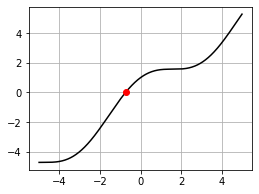

In [160]:
f2  = lambda x:x+np.cos(x)
df2 = lambda x:1-np.sin(x)
xi  = np.linspace(-5,5,1000)
plt.plot(xi,f2(xi),'-k') #
plt.grid(True)
xA,nA=getZeroNewton(f2,df2,.5,1e-12) # on part de 1
plt.plot(xA,f2(xA),'or') # affiche du zero
print(' Pour x0 = 0.5, la méthode converge en ', nA,' itérations')
xB,nB=getZeroNewton(f2,df2,1.,1e-12) # on part de 1
print(' Pour x0 = 1. , la méthode converge en ', nB,' itérations')
xC,nC=getZeroNewton(f2,df2,3.,1e-12) # on part de 1
print(' Pour x0 = 3., au bout de n = ',nC,' itérations, la méthode renvoie ',xC)

**Remarque 1:**

> Si la dérivée n'est pas connue, on peut l'estimer numérique par un schéma de différences finies (voir précédemment).

**Remarque 2:**

> On peut adapter la méthode de Newton au recherche du minimum d'une fonction suffisamment régulière car chercher le minimum d'une fonction $f$ revient à chercher l'annulation de sa dérivée. En effet, 

> si $x_0$ est un minimum de $f$, alors $g=\frac{\mathrm{d} f}{\mathrm{d} x}$ est nul en $x_0$. Cela revient à appliquer la méthode de Newton à la fonction $g$.

**Remarque 3:**

> La méthode de Newton possède de nombreuses généralisations dans le cas où $f$ est un champ scalaire en dimension $n$ (*i.e*, une fonction de $\mathbb{R^n} \to \mathbb{R}$), mais leur étude est hors programme.

## Intégration d'une fonction numérique

**Principe :**

> Soit $f$ une fonction numérique ($\mathbb{R^n} \to \mathbb{R}$), intégrable sur l'intervalle $[a \quad b]$ dont on souhaite calculer l'intégrale $\textrm{I(f,[a,b])}=\int_{x=a}^{x=b}\, f(x) \,\mathrm{d}x$.

> On réalise une subdivision équirépartie de l'intervalle en $n+1$ points équidistants :
$$\forall k \in [\![0 , n ]\!], \quad x_k=a+k\frac{(b-a)}{n}$$

Avec cette subdivision, il y a $n+1$ points et $n$ intervalles $[\![x_k , x_{k+1} ]\!]$, $k=0,1,\ldots,n-1$. (piquets $\ne$ intervalles!).

> La quantité $h=\frac{(b-a)}{n}$ est appelée le **pas d'intégration**.

L'idée est d'approximer le calcul d'intégrale par une somme finie de $n$ termes.

**Méthodes :**

Voici les trois principales méthodes à connaître.

Méthode des rectangles à gauche :
$$R_g(n) = \frac{b-a}{n} \sum_{k=0}^{n-1} f(x_k)$$
Méthode des rectangles à droite :
$$R_d(n) = \frac{b-a}{n} \sum_{k=1}^{n} f(x_k)$$
Méthode des trapèzes :
$$T(n)= \frac{b-a}{n} \left (\sum_{k=1}^{n-1} f(x_k)+\frac{f(a)+f(b)}{2}\right)$$

**Remarques :**

+ Ces trois méthodes possèdent le **même ordre de complexité** ($n$ ou $n+1$ sommes).

+ Lorsque le pas d'espace est divisée par dix, c'est-à-dire lorsque le raffinement est 10 fois plus fin (et donc le temps d'exécution 10 fois plus grand), l'erreur commise est 

 + 10 fois plus faible pour la méthode des rectangles,
 
  + 100 fois plus faible pour la méthode des trapèzes.
 
+ La méthode des trapèzes est donc plus performante (on dit qu'elle est d'**ordre 2**).

In [161]:
def intTrapeze(f,a=0,b=1,n=100): # renvoie l'intégrale de f sur [a,b] au sens des trapèzes
    h  =(b-a)/n # pas d'espace
    res=0       # somme initialisée à zéro
    for k in range(1,n) : # k varie de 1 à n-1 inclus
        xk = a+k*h # abscisse du k-ième point
        res += f(xk) # ajout d'un terme de la somme
    res += (f(a)+f(b))/2 # premier et dernier terme comptent pour 1/2
    return res*h   # on multiplie la somme par le pas d'espace

Exemple du calcul de l'intégrale
$$\int_0^1 \, \frac{4}{1+x^2} \, \textrm{d} x = 4\left[\arctan(x)\right]_{x=0}^{x=1} = \pi$$

In [162]:
g = lambda x:4/(1+x**2) # fonction à intégrer
I1=intTrapeze(g,a=0,b=1,n=100) # 101 points intermédiaires
I2=intTrapeze(g,a=0,b=1,n=1000) # 10001 points intermédiaires
print(I1)    # 4 premiers chiffres après la virgule sont OK
print(I2)    # 6 premiers chiffres après la virgule sont OK
print(np.pi)

3.141575986923129
3.141592486923124
3.141592653589793


On vérifie bien qu'avec $10$ fois plus de points, la méthodes des trapèzes est $10^2=100$ fois plus précise. C'est une méthode **d'ordre 2**.

Remarque : voici une version beaucoup plus performante qui utilise la possibilité de calcul vectoriel permise par Numpy : ``np.sum()`` somme de tous les termes d'un tableau ``nbarray``. La complexité algorithmique est la même mais le fait d'éviter l'usage d'une boucle ``for`` rend l'exécution beaucoup efficace en Python.

In [163]:
def intTrapezeNumpy(f,a=0,b=1,n=100): # renvoie l'intégrale de f sur [a,b] au sens des trapèzes
    xi=np.linspace(a,b,n+1) # subdivision avec n+1 points, a et b inclus
    h=(b-a)/n # largeur d'un intervalle entre les n+1 points
    res=np.sum(f(xi))  # on fait la somme sur TOUS les points
    res-=(f(a)+f(b))/2 # on retire le premier et le dernier terme
    return res*h       #  sans oublier de multiplier par le pas

In [164]:
I3=intTrapezeNumpy(g,a=0,b=1,n=1000)
I3 # le résultat est identique à celui obtenu précédemment (à 1e-15 près)

3.141592486923127

Comparaison des performances en temps d'exécution :

+ pour mesurer le temps écoulé, on utilise la méthode ``.perf_counter()`` de la bibliothèque ``time``
+ elle renvoie une date absolue (en secondes)
+ la différence entre deux dates successives donne la durée écoulée.

In [165]:
import time
t0 = time.perf_counter() # date initiale
for j in range(300):
    I=intTrapeze(g,a=0,b=1,n=int(1e4))
t1 = time.perf_counter() # date intermédiaire
print("Durée d'éxécution sans Numpy : ", t1-t0,' secondes')
for j in range(300):     
    I=intTrapezeNumpy(g,a=0,b=1,n=int(1e4))
t2 = time.perf_counter() # date finale
print("Durée d'éxécution avec Numpy : ", t2-t1,' seconde')
print('Rapport des durées : ',(t1-t0)/(t2-t1))

Durée d'éxécution sans Numpy :  1.0793246999996882  secondes
Durée d'éxécution avec Numpy :  0.020550600000206032  seconde
Rapport des durées :  52.52034977026789


Dans cet exemple, l'usage de la syntaxe Numpy rend le calcul environ **50 fois** plus rapide.

## Algorithme du pivot de gauss



**Problématique :**

Soit $A$ une matrice carrée inversible de $\mathscr{M}_{n,n}(\mathbb{R})$, $b$ un vecteur second membre de $\mathscr{M}_{n,1}(\mathbb{R})$ (vecteur colonne). 

On cherche à résoudre le système linéaire 

$$A x = b$$
où l'inconnue est le vecteur $x$ de $\mathscr{M}_{n,1}(\mathbb{R})$.

**Deux étapes :**

> (1) On va d'abord transformer le système $Ax=B$ en un système équivalent 
$$Tx = b'$$
> où la matrice $T$ est une matrice triangulaire supérieure inversible. Cette étape est appelée la réduction de Gauss-Jordan.

> (2) On résout ensuite le système $Tx=b'$ en commençant par la dernière ligne puis en remontant par substitutions successives.


**Opérations élémentaires sur les lignes :**

Voici les trois types d'*opérations élémentaires* sur la matrice $A$ :

+ ``L[i,:]*=coef`` : multiplication d'une ligne par un scalaire non nul,

+ ``L[i,:]+=coef*L[j,:]`` : ajout du multiple d'une ligne à une autre,

+ ``L[i,:],L[j,:] =  L[j,:],L[i,:]`` : échange des lignes $i$ et $j$,

> Les **mêmes opérations** doivent être effectuées conjointement sur la matrice $b$ constituant le second membre.

**Etape (1) = algorithme du pivot**

Voici le principe de l'algorithme, vu en 1ère année, qui conduit permet de se ramener à un système triangulaire supérieur :

![pivotGauss](img/pivotMethode3.png)


+ On procède de manière itérative sur les colonnes de $A$.

+ Pour la $j$-ième itération, on cherche dans la $j$-ième colonne le premier terme non nul en dessous de $A_{jj}$ (ou on prend celui de plus grand module).

+ C'est lui qui sert de pivot, il se situe sur la ligne $k$.

+ On permute la ligne $k$ et la ligne $j$ de manière à ramener le pivot "en haut".

+ Pour toutes les lignes $k>j$, on annule le terme de la $j$-ième colonne.

+ On recommence pour la colonne suivante.

Note : bien penser à effectuer sur la matrice $b$ *les mêmes opérations élémentaires* que sur la matrice $A$.

Voici ci-après, l'implémentation avec des matrices Numpy qui permet l'écriture compact des opérations sur les lignes telles que :

> ``A[k,:] += -alpha*A[j,:]``  : (Ligne k) $\,\leftarrow\,$ ( Ligne k )$-\alpha \times \,$ (Ligne j)

> En réalité cette opération "cache" $n$ multiplications et $n$ additions.

In [166]:
def pivot(A,b): # on travaille sur les lignes du système donc sur A et b
    n , m = A.shape
    for j in range(n): # boucle sur les colonnes, leur indice varie de 0 à n-1
        # étape 1 : trouver le pivot
        k0 = cherchePivot(A,j) # fonction auxiliaire
        # étape 2 : échanger la ligne k et la ligne j
        A[[k0,j],:]=A[[j,k0],:]
        b[k0],b[j] = b[j],b[k0]
        Ajj = A[j,j] # pivot qui, à ce moment, est en A[j,j] et non nul
        # étape 3 : on modifie toutes les lignes en dessous du pivot : 
        for k in range(j+1,n): # boucle sur les lignes d'indice j+1, j+2, ..., n-1
            alpha = A[k,j]/Ajj # coef. pour éliminer le 1er terme restant 
            A[k,:] += -alpha*A[j,:]
            b[k]   += -alpha*b[j]   # même opération sur b (ne pas oublier)
# la fonction modifie les valeurs des matrices (mutables) donc RETURN non nécessaire

def cherchePivot(A,k): # renvoie l'indice j de l'élément A[j,k] (pour j>=k)
                       # ayant le plus grand module
    n,m=A.shape
    val,jRes = np.abs(A[k,k]),k # valeur initiale, indice du 1er élément
    for j in range(k+1,n) : # boucle sur les éléments de la colonne 
                            # situés sous la diagonale
            if np.abs(A[j,k]) > val : # le module est-il plus grand?
                val  = np.abs(A[j,k])
                jRes = j    # on actualise l'indice du pivot 
    return jRes

In [167]:
A=np.array([[6.,2,1,0,5], [2,1,1,-2,1],[1,1,2,-2,3],
            [3,0,2,3,-1],[-1,-1,-3,4, 2]],dtype=float)
#A[2,2]=2.2 # rend A inversible
b=np.array([1,2,3,4,5.])
np.set_printoptions(formatter={'float': '{: 0.2f}'.format}) # affichage
print('A AVANT = \n',A)
A0,b0=A.copy(),b.copy() # recopie des valeurs initiales
pivot(A,b)
print('A APRES = \n',A) # après réduction
print('b APRES = \n',b) 

A AVANT = 
 [[ 6.00  2.00  1.00  0.00  5.00]
 [ 2.00  1.00  1.00 -2.00  1.00]
 [ 1.00  1.00  2.00 -2.00  3.00]
 [ 3.00  0.00  2.00  3.00 -1.00]
 [-1.00 -1.00 -3.00  4.00  2.00]]
A APRES = 
 [[ 6.00  2.00  1.00  0.00  5.00]
 [ 0.00 -1.00  1.50  3.00 -3.50]
 [ 0.00  0.00 -3.83  2.00  5.17]
 [ 0.00  0.00  0.00  1.48  3.65]
 [ 0.00  0.00  0.00 -0.00  0.71]]
b APRES = 
 [ 1.00  3.50  2.83  7.26  5.62]


**Etape (2) : méthode de remontée**

On part de la dernière ligne qui donne facilement $x_{n}$ :

$$x_{n} = \frac{b_{n}}{a_{n,n}}$$

puis on remonte.

La k-ième ligne du système est :
$$\sum_{j=k}^{n} A_{kj} x_j = b_k$$

Or, tous les $x_j$ tels que $j>k$ sont connus, on les fait donc passer dans le second membre :

$$ x_k = \frac{1}{A_{kk}} \left( b_k - \sum_{j=k+1}^{n} A_{kj} x_j\right) , \quad \forall k=n-1, n-2, \ldots, 2,1 $$

Voici l'algorithme illustré avec les indices Python. 

Attention au **décalage d'indices** : en Python, les indices vont de $0$ à $n-1$, alors qu'en mathématiques, les indices vont de $1$ à $n$. 

![methodeRemontee](img/remonteeMethod2.png)

In [168]:
def remonte(A,b) : # résoud A.x = b où A est triangulaire supérieure inversible
    n,m = A.shape  # A doit être carrée. dans la suite on suppose que n=m
    x = np.zeros(n)# initialisation du vecteur résultat
    
    # on traite d'abord le dernier élément
    x[n-1] = b[n-1] / A[n-1, n-1] # c'est la ligne x_n = b_n / A_nn
    
    # puis les n-1 autres éléments en remontant de n-2 à 0 :
    for k in range(n-2,-1,-1) : # ATTENTION, il faut bien écrire -1 pour arriver en zéro !
        # on calcule la somme des termes a_kj . x_j  pour j allant de k+1 à n-1
        somme=0
        for j in range(k+1,n) : # tous les terms x[j] sont déjà calculés
            somme += A[k,j] * x[j]
        x[k] = (b[k] - somme) / A[k,k]
    return x # ici on renvoie le vecteur x

Voici donc l'étape (2) de l'exemple avec la matrice ``A`` et le second membre ``b``.

In [169]:
x=remonte(A,b)
print(x)

[ 17.21 -72.17  2.29 -14.75  7.96]


Ci-dessous, la fonction permettant la résolution du système $Ax=b$ avec les deux étapes mises bout à bout.

In [170]:
def mySolve(A,b): # méthode complète
    n,m = A.shape #
    p, = b.shape  #  tuple d'un élément ( ou aussi p = len(b) )
    if (n==m) and (n==p) :
        pivot(A,b)          # étape (1)
        return remonte(A,b) # étape (2)
    else:
        print('Pb de dimensions')

In [171]:
mySolve(A0,b0) # résolution complète

array([ 17.21, -72.17,  2.29, -14.75,  7.96])

Utilisaiton de la bibliothèque *linalg*

In [172]:
np.linalg.solve(A0,b0) # on retrouve bien le même résultat !

array([ 17.21, -72.17,  2.29, -14.75,  7.96])

In [173]:
np.matmul(A0,x)-b0 # .matmul() = produit de matrice, et numériquement A x - b ~ 0

array([ 0.00,  0.00,  0.00,  0.00,  0.00])

**Complexité :** 

La complexité de l'algorithme du pivot est en $\mathcal{O}(n^3)$ car, il a une boucle :

+ sur les colonnes $k$ pour les n pivots
+ sur chacune des $(n-k)$ lignes située "sous" la k-ième
+ la *transvection* $\quad \textrm{Ligne j} \leftarrow \textrm{Ligne j} -\alpha\times  \textrm{Ligne k} \quad$ nécessite $(n-k+1)$ opérations élémentaires.

La complexité de l'algorithme de remontée est en $\mathcal{O}(n^2)$ car il n'y a que deux boucles imbriquées. Ce n'est donc pas l'étape limitante du calcul.

> Notons qu'il existe des **algorithmes itératifs** qui, à partir d'un vecteur $x_0$ initial, permet de construire par récurrence une suite de vecteurs $(x_k)$ qui converge vers la solution, le calcul de chaque terme de la suite étant de complexité $\mathcal{O}(n)$. 

> Ainsi, lorsque la dimension du système à résoudre $n$ est très grande $( n \sim 10^3, 10^4, 10^5)$, ces méthodes sont avantageuses car la suite converge généralement en un nombre d'itérations $p$ très inférieur à $n$. La complexité finale est donc 
$$p\times \mathcal{O}(n^2) \ll \mathcal{O}(n^3)$$

## Systèmes dynamiques (simulation numériques)

Un système dynamique différentiel est une équation différentielle dans laquelle l'inconnue est une fonction vectorielle du temps, $t$, 
$$\vec{Y} : t \to \vec{Y}(t) \in \mathbb{R}^p $$
qui s'écrit sous la forme
$$\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} = f\left(\vec{Y}(t),t\right)$$

où $f$ est une fonction connue qui, à partir de l'état du système à l'instant $t$ (l'état étant entièrement défini par la donnée du vecteur $\vec{Y}(t)$), permet de calculer la dérivée de $\vec{Y}$ à l'instant $t$.

> Lorsque la fonction $f$ est suffisamment régulière (cf [problème de Cauchy](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_Cauchy)), il existe une unique solution pour une condition initiale définie à la date $t_0$ par :

$$ \vec{Y}(t=t_0) = \vec{C_0}, \quad \textrm{ le vecteur } \vec{C}_0 \, \textrm{étant donné}$$


**Méthode d'Euler (explicite):**

Il s'agit d'une méthode de résolution approchée qui se base sur le développement limité à l'ordre 1 de la dérivée de la fonction $\vec{Y}(t)$, soit :

$$\vec{Y}(t+h) = \vec{Y}(t) + h\times \left.\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} \right|_t+o(h)$$
Soit 
$$\vec{Y}(t+h) \approx \vec{Y}(t) + h\times f\left(\vec{Y}(t),t) \right)$$

On peut également voir cette relation comme l'approximation "*à gauche*" de la dérivée, soit
$$\left.\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} \right|_{t} \approx \frac{f(t+h)-f(t)}{h}$$
**Principe :**

> A partir de la date initiale $t_0$, On construit une grille de dates $t_n$ uniformément réparties et séparées d'un pas de temps $h$ "petit" :
$$t_n = t_0 + n.h \quad \textrm{ "instants d'échantillonnage" }$$
> Pour chaque date, on approche la valeur de $\vec{Y}(t_n)$ par 
$$ \vec{Y}(t_n) \approx \vec{Y}_n $$
où $\vec{Y}_n$ est le terme d'indice $n$ d'une suite définie par récurrence selon:

$$\forall n \in \mathbb{N},\quad\vec{Y}_{n+1} = \vec{Y}_{n} + h\times f \left( \vec{Y}_{n},t_n\right) \quad \textrm{et} \quad \vec{Y}_0 =\vec{C}_0$$ 

**Autre méthode : Euler implicite**

La méthode d'Euler *implicite* est une variante qui offre une meilleure stabilité numérique. Elle découle l'approximation "*à droite*" de la dérivée selon :
$$\left.\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} \right|_{t+h} \approx \frac{f(t+h)-f(t)}{h}$$

Elle conduit à une relation de récurrence **plus difficile** à gérer :
$$\forall n \in \mathbb{N},\quad\vec{Y}_{n+1} = \vec{Y}_{n} + h\times f \left( \vec{Y}_{n+1},t_n\right) \quad \textrm{et} \quad \vec{Y}_0 =\vec{C}_0$$ 
En effet, le terme au rang suivant, $\vec{Y}_{n+1}$, apparait simulatément dans le membre de gauche mais aussi dans le membre de droite de l'équation. En pratique, on utilise une méthode numérique pour trouver la racine de l'équation (du type résoudre $f(x)=0$).


**Mise en oeuvre :**

Pour mettre en oeuvre la méthode, il faut se donner :

+ un problème physique, c'est à dire une fonction d'évolution $f$
+ les conditions initiales, $t_0$ et $\vec{C}_0$,
+ *l'intégrateur*, c'est à dire la méthode de résolution approchée elle-même, et ses paramètres :
 + valeur du pas de temps $h$ ,
 + et la date finale de la résolution $t_f$.

Etape (1) : conception de *l'intégrateur*

Principe : 
c'est une fonction Python qui reçoit comme **arguments d'entrée** : 

+ la fonction d'évolution ``f``, telle que ``f(y,t)`` donne la dérivé de $\vec{Y}$ à la date $t$
+ la condition $\vec{C_0}$, un vecteur colonne de dimension $p$
+ le pas d'espace $h$, la date initiale $t_0$ et la date finale $t_f$.

et qui **renvoie** :

+ la liste ``tList`` des $N+1$ dates $t_n=t_0, t_1, \ldots, t_N$,
+ l'ensemble des valeurs approchées $\vec{Y}_n$ sous la forme d'une liste ``yList`` de ``ndarray`` de dimension $p$ :


In [1]:
import matplotlib.pyplot as plt
import numpy as np
def integEulerExp(f, C0, h = 1e-3, t0 = 0, tf = 1.): #Euler
    # remarque : f(Y,t) renvoie le vecteur dérivé en tant que ndarray
    t, y = t0, C0 # date et état initial
    tList = [t] # initialisation de la liste des dates tn
    yList = [y] # initialisation de la liste des Yn
    while t<tf : # condition d'arret
        yNext = y + h * f(y,t) # équation d'évolution
        y = yNext # on passe au terme Yn suivant
        t = t + h # on passe à l'instant suivant
        tList.append(t)    # ajoute la date tn dans  tList
        yList.append(y) # ajoute le vecteur Yn dans ylist
    return tList,yList    

Etape (2) : choix d'un problème physique.

Exemple 1 : attraction de Lorenz

Soit le système différentiel 
$$\left\{\begin{array}{rcl}
\frac{\textrm{d}x}{\textrm{d}t} & = & \sigma \left(y(t) - x(t) \right) \\
\frac{\textrm{d}y}{\textrm{d}t} & = & \rho x(t) - y(t) -x(t) z(t) \\
\frac{\textrm{d}z}{\textrm{d}t} & = & x(t) y(t) - \beta z(t) \\
\end{array} \right.$$

Pour $\sigma = 10, \beta = 8/3$ et  $\rho = 28$.

**Méthode :**

Il faut écrire une fonction Python ``Lorenz(Y,t)`` qui reçoit le vecteur ``Y``$=\vec{Y}$ à l'instant $t$,

$$\vec{Y}(t) = \left\{\begin{array}{c}
x(t) \\ y(t) \\ z(t) \\
\end{array} \right.\quad \textrm{ soit, en Python }  \quad
\textrm{Y} = \left\{\begin{array}{c}
\textrm{x} \\ \textrm{y} \\ \textrm{z} \\
\end{array} \right.$$

et renvoie le vecteur dérivé ``dY``$=\frac{\textrm{d}\vec{y}}{\textrm{d}t}$ dont les coordonnées en Python sont les trois variables ``dx``, ``dy`` et ``dz`` :
$$\vec{Y}(t) = \left\{\begin{array}{c}
x(t) \\ y(t) \\ z(t) \\
\end{array} \right. \quad \textrm{ soit, en Python }  \quad
\textrm{dY} = \left\{\begin{array}{c}
\textrm{dx} \\ \textrm{dy} \\ \textrm{dz} \\
\end{array} \right.$$

In [2]:
sigma, beta, rho = 10.,8./3,28. # flottants donnés
def lorenz(Y,t) : # squelette imposé par l'intégrateur, 
                  # Y est de type ndarray
    x, y, z = Y # unpack de Y :  x, y et z sont des ndarray
    dx = sigma * (y - x)
    dy = rho * x - y - x * z
    dz = x * y - beta * z
    return np.array([dx, dy, dz]) # packing pour faire un ndarray

Lancement de la simulation ( = résolution du système différentiel )

avec comme paramètres $\vec{C}_0 = ( 1, 0 ,0 )$, ``h = 1e-3`` et ``tf = 5``,

Il suffit d'appeler la fonction ``integEulerExp(f,C0,h,t0,tf)`` où l'argument ``f`` est la fonction ``lorenz`` que l'on vient de définir précédemmet.

La fonction ``integEulerExp`` renvoie le *tuple* ``tList,yList`` contenant :

+ la liste des dates $t_n$ ,
+ la liste des vecteurs $Y_n$ pour chacune de ces dates.

In [3]:
C0 = np.array([1, 0 ,0]) # condition initiale = tableau Numpy de type ndarray
tList, yList = integEulerExp(lorenz ,C0 , h = 1e-3, t0 = 0, tf = 50 )

Affichage de la trajectoire du point $M(t)$ dont les coordonnées $(x(t), y(t), z(t))$ sont les composantes du vecteur $\vec{Y}(t)$.

Pour cela :

1. on convertit les listes de vecteurs ``tList`` et ``yList`` en matrices (*ndarray*), ce qui permet d'extraire aisément les colonnes :
Nous avons converti la liste ``yList`` renvoyées par l'intégrateur en matrice de $(N+1)$ lignes par $p=4$ colonnes.

![systemeDynamique](img/systemeDynamiqueData3.png)

  + La 1ère colonne donne les coordonnées $x$ aux dates $t_n$, $x(t_n)$
  + La 2ème colonne donne les coordonnées $y$ aux dates $t_n$, $y(t_n)$
  + La 2ème colonne donne les coordonnées $z$ aux dates $t_n$, $z(t_n)$
  

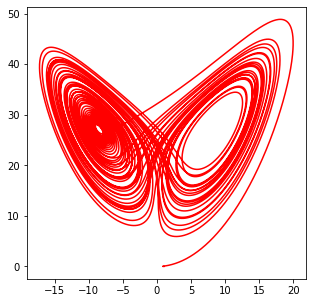

In [4]:
plt.rcParams["figure.figsize"] = (5, 5) #
Yi = np.array(yList) # conversion en matrice de N+1 lignes et 3 colonnes
xi = Yi[:,0] # 1ère colonne => coordonnée x
yi = Yi[:,1] # 2ème colonne => coordonnée y
zi = Yi[:,2] # 3ème colonne => coordonnée z
plt.plot(xi,zi,'r') # projectionperpendiculairement à y
plt.show()

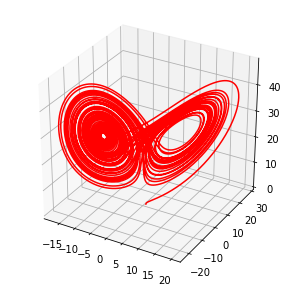

In [5]:
# Affichage dans un espace 3D 
from mpl_toolkits.mplot3d import Axes3D # importation de la méthode Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xi,yi,zi,'r')
#plt.show()

Exemple 2.

Système mécanique non-linéaire à deux degrés de libertés.

On considère un pendule constitué d'une masse reliée à une tige élastique de longueur au repos $L$, qui agit comme un ressort de raideur $k$. Le pendule est lâché à partir d'une position horizontale.

![penduleRessortSchema](img/penduleRessortSchema2.png)

Les équations du mouvement sont :

$$\left\{\begin{array}{rcl} \ddot{r} -r\dot{\theta}^2 & = &-\frac{k}{m}(r-L) + g \cos \theta \\
r \ddot{\theta} +2\dot{r}\dot{\theta} &= &-g \sin \theta \end{array} \right.$$

On considère le vecteur $$\vec{Y}(t) = 
\left(\begin{array}{c} r \\ \dot{r} \\ \theta \\ \dot{\theta} \end{array}\right)$$

+ écrire les équations du mouvement sous la forme d'un système dynamique
$$\frac{\mathrm{d}\vec{Y}}{\mathrm{d} t} = f\left(\vec{Y}(t),t\right)$$

**Solution :** 

Le but est d'obtenir les coordonnées de la dérivée de $\vec{Y}$ en fonction des coordonnées de $\vec{Y}$ et du temps $t$.

En isolant les dérivées secondes, on obtient : $$\left\{\begin{array}{rcl} \ddot{r} & = &r\dot{\theta}^2 -\frac{k}{m}(r-L) + g \cos \theta \\
\ddot{\theta} &= & \frac{1}{r} \left(-2\dot{r}\dot{\theta} -g \sin \theta \right) \end{array} \right.$$

En notant le vecteur $\vec{Y}$ en ligne 

$$\vec{Y}=(\textrm{r},\textrm{rp},\textrm{theta},\textrm{thetap})$$ et les coordonnées de sa dérivée par rapport au temps, 

$$d\vec{Y} = (\textrm{dr},\textrm{drp},\textrm{dtheta},\textrm{dthetap})$$ 

On a donc :

$$\left\{\begin{array}{rcl} \textrm{dr} &= &rp\quad \textrm{car} \, \dot{\theta} = \dot{\theta} \\ 
\textrm{drp} & = & \textrm{r}.\textrm{dtheta}^2 -\frac{k}{m}(\textrm{r}-L) + g \cos (\textrm{theta}) \\
\textrm{dtheta} & =& \textrm{thetap} \\
\textrm{dthetap} &= & \frac{1}{\textrm{r}} \left(-2\textrm{rp}\times\textrm{thetap}-g \sin \textrm{theta} \right) 
\end{array} \right.$$

Voici la fonction correspondante pour laquelle les paramètres du système physique ($m = $ 1 kg, $L = 1$ m et $k = 6$ N.m$^-1$) sont définis en unités SI.

In [6]:
m,k,L,g = 1.,6.,1., 9.81 # en kg, N/m, m et m.s^-2
def pendule(Y,t) : # la forme de la fonction d'évolution est imposée
    # Y est un vecteur de type ndarray
    r,rp,theta,thetap = Y # unpack des coordonnées
    dr = rp
    drp = r*thetap**2 - k/m*(r-L)+g*np.cos(theta)
    dtheta = thetap
    dthetap =(-2*rp*thetap-g*np.sin(theta))/r
    return np.array([dr,drp,dtheta, dthetap]) # on retourne un ndarray

In [7]:
# script pour le calcul
k=4.5
t0 = 0
C0 = np.array([1.,0.,np.pi/2,0])
tn,Yn=integEulerExp(pendule,C0,h=5e-3,tf=10)

In [8]:
tn=np.array(tn) # conversion en ndarray
Yn=np.array(Yn) # conversion en ndarray

Nous avons converti la liste ``yList`` renvoyées par l'intégrateur en matrice de $(N+1)$ lignes par $p=4$ colonnes.

![systemeDynamique](img/systemeDynamiqueData3.png)

In [9]:
rn = Yn[:,0] # extraction de la distance r, 1ère colonne
thetan = Yn[:,2] # extraction de l'angle theta, 3ème colonne 

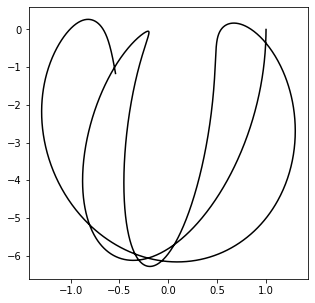

In [10]:
# coordonnées dans la base d'affichage x,y 
xn = rn*np.sin(thetan)
yn = -rn*np.cos(thetan) # ne pas confondre Yn et yn !
plt.plot(xn,yn,'-k') #  trajectoire

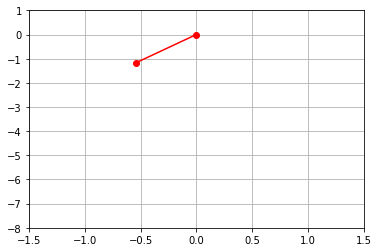

In [18]:
# animation
import time
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-8,1)
plt.grid(True)
h1,=plt.plot([0,xi[0]],[0,yi[0]],'-or')
N=len(xn)
for n in range(0,N,5):
    h1.set_xdata([0,xn[n]])
    h1.set_ydata([0,yn[n]])
    fig.canvas.draw()
    time.sleep(0.002)        

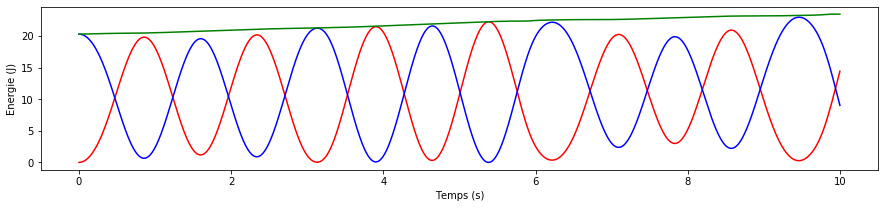

In [12]:
# Energie du système à chaque instant
vitesse2 = Yn[:,1]**2 + (Yn[:,0]*Yn[:,3])**2 # V^2=(dr/dt)^2 + (r .dtheta/dt)^2
Ecinetique = 0.5*m*vitesse2 # Energie cinétique 
Epot = 0.5*k*(Yn[:,0]-L)**2 -m*g*Yn[:,0]*np.cos(Yn[:,2]) # potentielle élastique + pesanteur
Epot = Epot - np.min(Epot) # normalisation pour que Epot = 0
plt.rcParams["figure.figsize"] = (15, 3) # Figure allonée
plt.plot(tn,Ecinetique,'-r')      # Energie cinétique en rouge
plt.plot(tn,Epot,'-b')            # Eenergie potentielle en bleu
plt.plot(tn,Epot+Ecinetique,'-g') # Energie totale en vert
plt.xlabel('Temps (s)')
plt.ylabel('Energie (J)')
plt.show()

**Observations et conclusions :**

> On constate une dérive de l'énergie bien que, pour ce système mécanique conservatif, l'énergie totale devrait rester constante.

> La légère dérive énergétique est due au caractère approché de la méthode d'Euler. En augmentant le pas de temps ou en prenant une autre méthode d'intégration plus performante, on obtient des résultats plus statisfaisants.